# 建模测试

In [2]:
import pandas as pd
import sklearn as skr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from typing import *
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1024)

labels = ['total_purchase_amt', 'total_redeem_amt']

In [3]:
date_indexs = ['week','year','month','weekday','day']

## 参考特征组合

In [4]:
data_purchase_drop = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/purchase_feature_droped_0810.csv')
data_purchase_drop['date'] = pd.to_datetime(data_purchase_drop['date'])

In [5]:
data_redeem_drop = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/redeem_feature_droped_0810.csv')
data_redeem_drop['date'] = pd.to_datetime(data_redeem_drop['date'])

In [ ]:
result_purchase_lr = generate_online_result(data_purchase, [x for x in data_purchase.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem, [x for x in data_redeem.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

## is_特征

In [4]:
data_purchase = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/purchase_all_feature.csv')
data_purchase['date'] = pd.to_datetime(data_purchase['date'])

In [5]:
data_redeem = pd.read_csv('The-Purchase-and-Redemption-Forecast-Challenge-baseline/redeem_all_feature.csv')
data_redeem['date'] = pd.to_datetime(data_redeem['date'])

In [ ]:
base = pd.read_csv('base.csv')
base = base.iloc[:,1:]

In [7]:
data_purchase.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,purchase_weekdayrate,redeem_weekdayrate,purchase_dayrate,redeem_dayrate,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,1.273349,1.161819,1.710632,2.069919,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,1.093144,1.189935,1.572264,1.453653,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,1.149968,0.992409,0.936909,0.738965,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,0.899730,1.002284,0.706586,0.862685,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,0,...,0.744373,0.561287,0.680947,0.471696,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [8]:
data_purchase.tail()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,purchase_weekdayrate,redeem_weekdayrate,purchase_dayrate,redeem_dayrate,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
178,2014-09-26,NaN,NaN,0,0,0,0,0,1,0,...,1.14212,1.008503,1.1426,1.008389,238565132.5,2.398712e+08,125336258.0,374884735.0,4.677628e+07,0.512993
179,2014-09-27,NaN,NaN,1,0,0,0,0,0,1,...,1.14212,1.008503,1.1426,1.008389,177821764.5,1.837682e+08,128268053.0,287240171.0,3.780935e+07,1.348706
180,2014-09-28,NaN,NaN,1,0,0,0,0,1,0,...,1.14212,1.008503,1.1426,1.008389,175137350.5,1.884616e+08,129477254.0,303087562.0,5.128193e+07,1.271673
181,2014-09-29,NaN,NaN,0,0,0,0,0,1,0,...,1.14212,1.008503,1.1426,1.008389,325022934.5,3.116713e+08,158219402.0,398884905.0,6.226505e+07,-0.862948
182,2014-09-30,NaN,NaN,0,0,0,0,0,1,0,...,1.14212,1.008503,1.1426,1.008389,302997322.0,3.173125e+08,224240103.0,453955303.0,7.046140e+07,0.655128


In [6]:
data_purchase = data_purchase[(data_purchase['date'].dt.date >= datetime.date(2014,4,1))&(data_purchase['date'].dt.date < datetime.date(2014,10,1))].reset_index(drop=True)
data_purchase['total_purchase_amt'] = base['total_purchase_amt']
data_purchase['total_redeem_amt'] = base['total_redeem_amt']

NameError: name 'base' is not defined

In [428]:
data_redeem = data_redeem.copy()[(data_redeem['date'].dt.date >= datetime.date(2014,4,1))&(data_redeem['date'].dt.date < datetime.date(2014,10,1))].reset_index(drop=True)
data_redeem['total_purchase_amt'] = base['total_purchase_amt']
data_redeem['total_redeem_amt'] = base['total_redeem_amt']

# data_purchase和base的时间跨度是不一样的

In [429]:
data_purchase.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,purchase_weekdayrate,redeem_weekdayrate,purchase_dayrate,redeem_dayrate,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-04-01,0.730303,0.634370,0,0,0,0,0,1,0,...,1.273349,1.161819,1.710632,2.069919,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-02,0.818276,0.761724,0,0,0,0,0,1,0,...,1.093144,1.189935,1.572264,1.453653,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-03,0.768604,0.703255,0,0,0,0,0,1,0,...,1.149968,0.992409,0.936909,0.738965,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-04,0.680148,0.926145,0,0,0,0,0,1,0,...,0.899730,1.002284,0.706586,0.862685,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-05,0.654067,1.654855,1,1,1,0,0,0,0,...,0.744373,0.561287,0.680947,0.471696,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [9]:
data_purchase_is = data_purchase.iloc[:,:29]
data_redeem_is = data_redeem.iloc[:,:29]

In [10]:
data_purchase_is.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,is_second_week,is_third_week,is_fourth_week,weekday_onehot_0,weekday_onehot_1,weekday_onehot_2,weekday_onehot_3,weekday_onehot_4,weekday_onehot_5,weekday_onehot_6
0,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,0,...,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 所有is特征

#### 线性模型测试八月份效果（线下）

In [18]:
# 分割数据集

def split_data_underline(data: pd.DataFrame)->pd.DataFrame:
    trainset = data[(datetime.date(2014,4,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,8,1))]
    testset = data[(datetime.date(2014,8,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    return trainset, testset

def split_data_online(data: pd.DataFrame)->pd.DataFrame:
    trainset = data[(datetime.date(2014,4,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    testset = data[(datetime.date(2014,9,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,10,1))]
    return trainset, testset

In [14]:
def generate_under_result(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_underline(df)
    model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = model.predict(testset[feature])
    return result_purchase_lr

In [17]:
# 定义评价函数

def AE(y: Iterable, yhat: Iterable)->Iterable:
    return np.abs(y - yhat) / np.abs(y)

def total_AE(purchasehat: Iterable, redeemhat: Iterable, purchase: Iterable, redeem: Iterable, h: int = 0.3)->Iterable:
    return sum(map(lambda x : np.exp(-x/h)*10, AE(purchase, purchasehat))) * 0.45 + sum(map(lambda x : np.exp(-x/h)*10, AE(redeem, redeemhat))) * 0.55

In [15]:
trainset, testset = split_data_underline(data_purchase_is)
result_purchase_lr = generate_under_result(data_purchase_is, [x for x in data_purchase_is.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is, [x for x in data_redeem_is.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [19]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

181.33136087344425

#### 在各模型下测试各阶段效果（线下）

In [20]:
# 在不同的时间段对模型进行验证

def week_evalution_single(data: pd.DataFrame, model: object, types: str)->pd.DataFrame:
    results = []
    a_month = relativedelta(months=1)
    for i in [datetime.date(2014, 8, 1), datetime.date(2014, 7, 25), datetime.date(2014, 7, 18), datetime.date(2014, 7, 11), 
          datetime.date(2014, 7, 4), datetime.date(2014, 6, 27), datetime.date(2014, 6,20)]:
        trainset = data[(i - 4 * a_month <= data['date'].dt.date) & (data['date'].dt.date < i)] # 前四个月的数据作为训练集
        testset = data[(i <= data['date'].dt.date) & (data['date'].dt.date < i + a_month)]
        if len(testset) == 0 or len(trainset) == 0:
            i = datetime.date(2014, 4, 20)
            trainset = data[(i - 4 * a_month <= data['date'].dt.date) & (data['date'].dt.date < i)]
            testset = data[(i <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014, 9, 1))]
        feature = [x for x in trainset.columns if x not in ['total_purchase_amt','total_redeem_amt','date']]
         
        model.fit(X=trainset[feature], y=trainset['total_' + types + '_amt'])
        result_lr = model.predict(testset[feature])
        
        h = 0.3
        results.append(sum(AE(testset['total_' + types + '_amt'], result_lr).apply(lambda x : np.exp(-x/h))*10))
    return pd.DataFrame(results)

In [21]:
# 输出评级表格

def draw_eva_table(df: pd.DataFrame)->pd.DataFrame:
    rest = df.copy()
    rest['interval'] = [datetime.date(2014, 8, 1), datetime.date(2014, 7, 25), datetime.date(2014, 7, 18), datetime.date(2014, 7, 11), 
          datetime.date(2014, 7, 4), datetime.date(2014, 6, 27), datetime.date(2014, 6,20)]
    return rest

In [22]:
def multi_model_eva(data, types:str = 'purchase'):
    results = pd.DataFrame()
    for model in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')]:
        if results.empty:
            results = draw_eva_table(week_evalution_single(data, model, types)).rename(columns={0: repr(model).split('(')[0]})
        else:
            results = pd.merge(results, \
                               draw_eva_table(week_evalution_single(data, model, types)).rename(columns={0: repr(model).split('(')[0]}), on='interval')
    results = results[['interval'] + [x for x in results.columns if x != 'interval']]
    return results

In [23]:
# 重载DataFrame加法

def add_two_df(df1, df2, features = None, left_a = 0.45, right_a = 0.55):
    data = df1.copy()
    if not features:
        features = [x for x in data.columns if x != 'interval']
    for i in features:
        data[i] = (data[i] * left_a + df2[i] * right_a)
    return data

In [24]:
add_two_df(multi_model_eva(data_purchase_is, 'purchase'), multi_model_eva(data_redeem_is, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,181.331361,171.303048,172.101325,176.137973,153.469601,167.801773
1,2014-07-25,167.808904,171.674882,164.927662,164.055455,150.506737,155.525437
2,2014-07-18,185.411474,175.901452,182.320429,180.601320,157.983692,167.955013
3,2014-07-11,186.461505,167.598945,176.339056,184.770219,162.196942,164.824971
4,2014-07-04,171.472989,156.233453,165.973022,158.681723,146.170706,161.581715
5,2014-06-27,170.655168,159.534507,164.992039,159.533112,150.776164,159.233840
6,2014-06-20,158.536592,162.924075,168.889052,160.218002,156.808060,161.498673


#### 九月份预测效果

In [25]:
# 生成线上结果

def generate_online_result(df: pd.DataFrame, feature: Iterable, model = LinearRegression(), target:str = 'total_purchase_amt')->Iterable:
    trainset, testset = split_data_online(df)
    model.fit(X=trainset[feature], y=trainset[target])
    result_purchase_lr = model.predict(testset[feature])
    return result_purchase_lr

In [443]:
result_purchase_lr = generate_online_result(data_purchase_is, [x for x in data_purchase_is.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is, [x for x in data_redeem_is.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [40]:
trainset, testset = split_data_online(data_purchase_is)

In [26]:
# 生成线上提交的格式

def normalize_upload_file(result_purchase_lr: Iterable, result_redeem_lr: Iterable, testset: pd.DataFrame)->pd.DataFrame:
    testset['total_purchase_amt'] = result_purchase_lr
    testset['total_redeem_amt'] = result_redeem_lr
    online_upload = testset[['date','total_purchase_amt','total_redeem_amt']]
    online_upload['date'] = online_upload['date'].astype(str)
    online_upload['date'] = online_upload['date'].str.replace('-','')
    return online_upload

In [42]:
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_predict.csv',index=False,header=None)

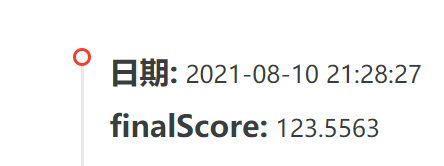

### is特征分析(特征选取)

#### purchase

##### 绘制箱型图

In [27]:
# 绘制箱型图

def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(7, 4, figsize=(18, 24))
    global date_indexs, labels
    count = 0
    for i in [x for x in data.columns if x not in date_indexs + labels + ['date']]:
        sns.boxenplot(x=i, y='total_purchase_amt', data=data, ax=axes[count // 4][count % 4])
        count += 1

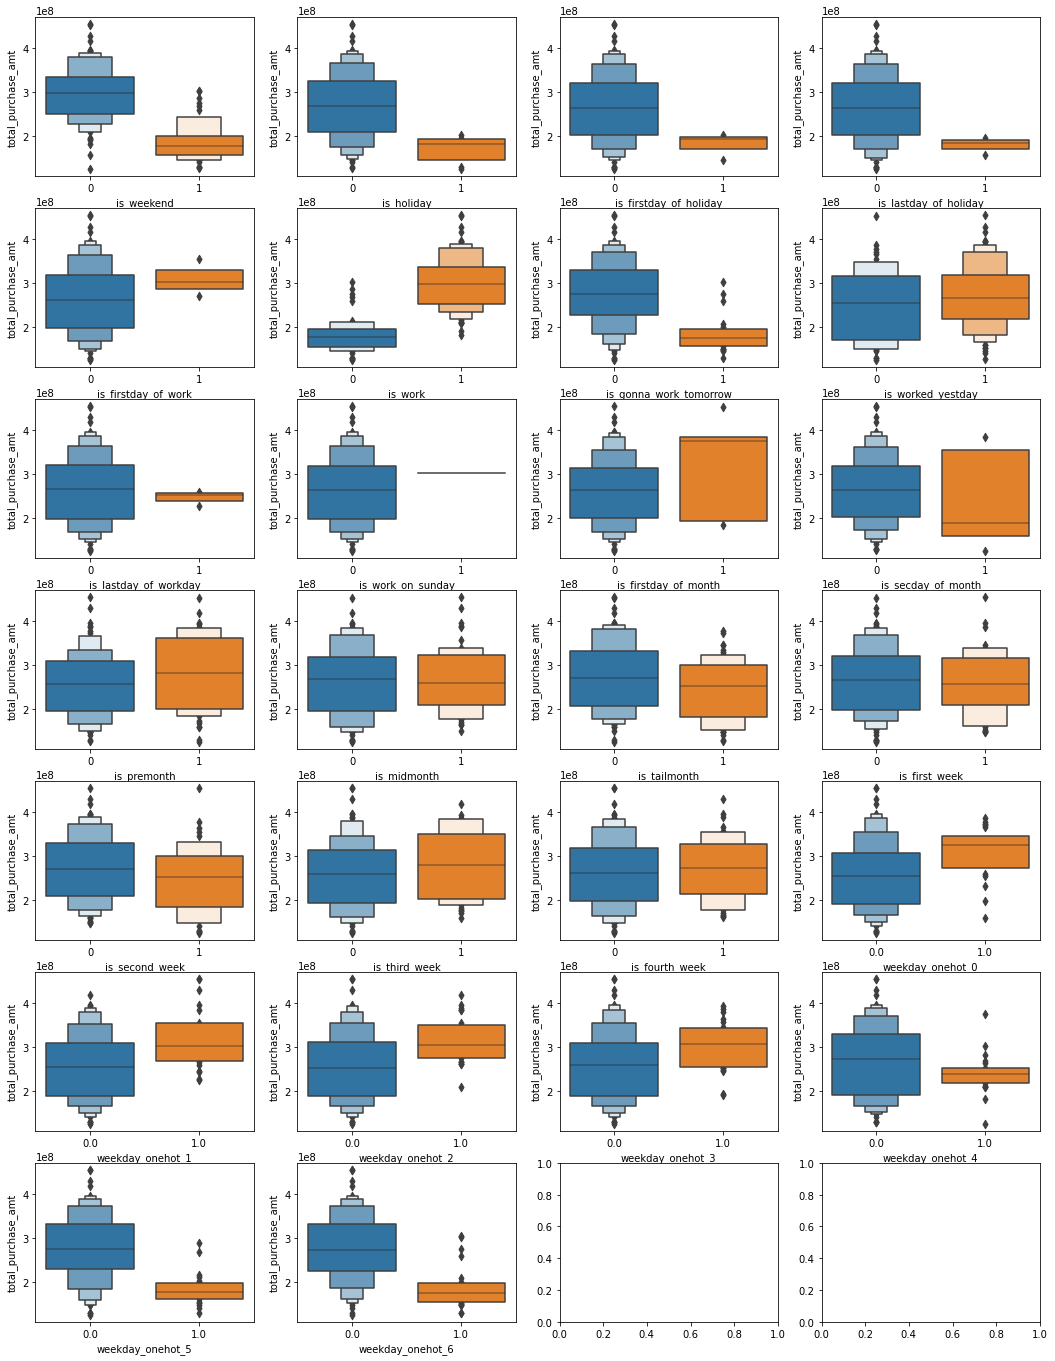

In [28]:
draw_boxplot(data_purchase_is)

In [448]:
## 剔除看起来较差的特征 (for rate)

purchase_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_work_on_sunday',
      #中位数差异不明显
      'is_weekend'
]


In [29]:
## 剔除看起来较差的特征

purchase_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_work_on_sunday',
      #中位数差异不明显
      'is_first_week',
      'is_midmonth'
]


##### 画相关性热力图

In [30]:
# 画相关性热力图

def draw_correlation_heatmap(data: pd.DataFrame, way:str = 'pearson')->None:
    feature = data.copy()
    plt.figure(figsize=(20,10))
    plt.title('The ' + way +' coleration between total purchase and each feature')
    sns.heatmap(feature[[x for x in feature.columns if x not in ['total_redeem_amt', 'date'] ]].corr(way),linecolor='white',
        linewidths=0.1,
        cmap="RdBu")

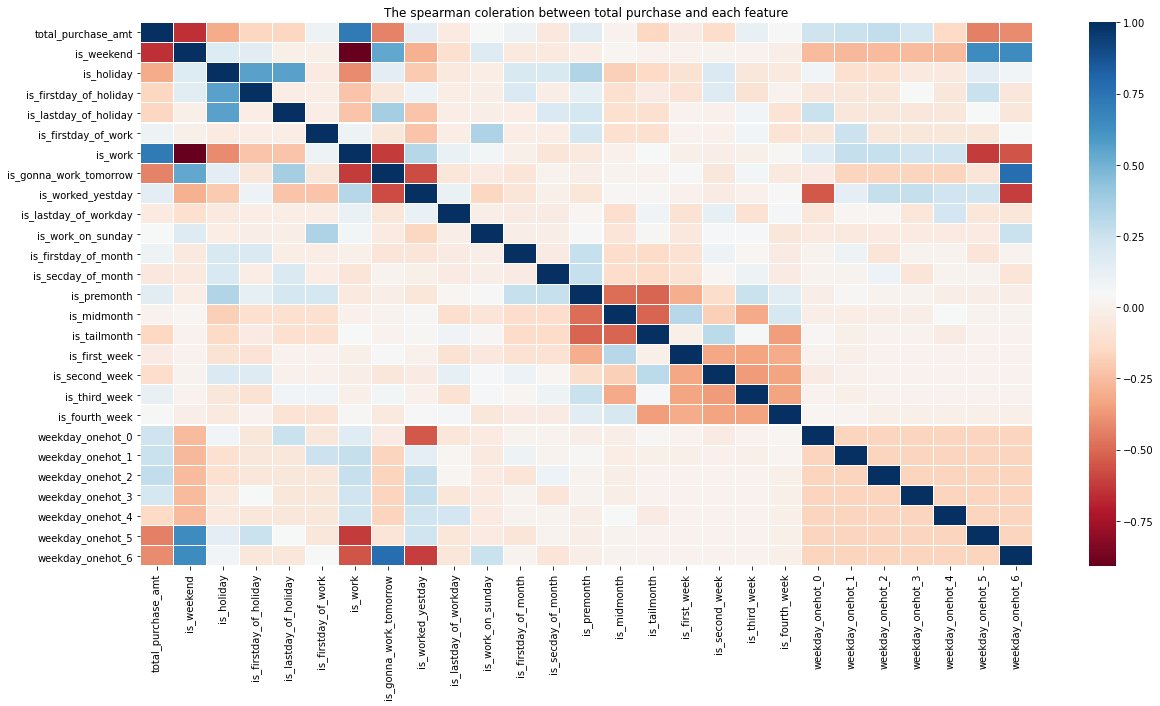

In [31]:
draw_correlation_heatmap(data_purchase_is, 'spearman')

In [32]:
# 剔除相关性较低的特征

temp = np.abs(data_purchase_is[[x for x in data_purchase_is.columns 
                       if x not in ['total_redeem_amt', 'date'] ]].corr('spearman')['total_purchase_amt'])
purchase_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [33]:
purchase_feature_low_correlation

['is_firstday_of_month',
 'is_secday_of_month',
 'is_first_week',
 'is_lastday_of_workday',
 'is_fourth_week',
 'is_midmonth',
 'is_firstday_of_work',
 'is_work_on_sunday']

In [34]:
data_purchase_is_drop = data_purchase_is[[x for x in data_purchase_is.columns 
                   if (x not in purchase_feature_low_correlation + purchase_feature_seems_useless)]]

#### redeem

In [35]:
# 绘制箱型图

def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(7, 4, figsize=(18, 24))
    global date_indexs, labels
    count = 0
    for i in [x for x in data.columns if x not in date_indexs + labels + ['date']]:
        sns.boxenplot(x=i, y='total_redeem_amt', data=data, ax=axes[count // 4][count % 4])
        count += 1

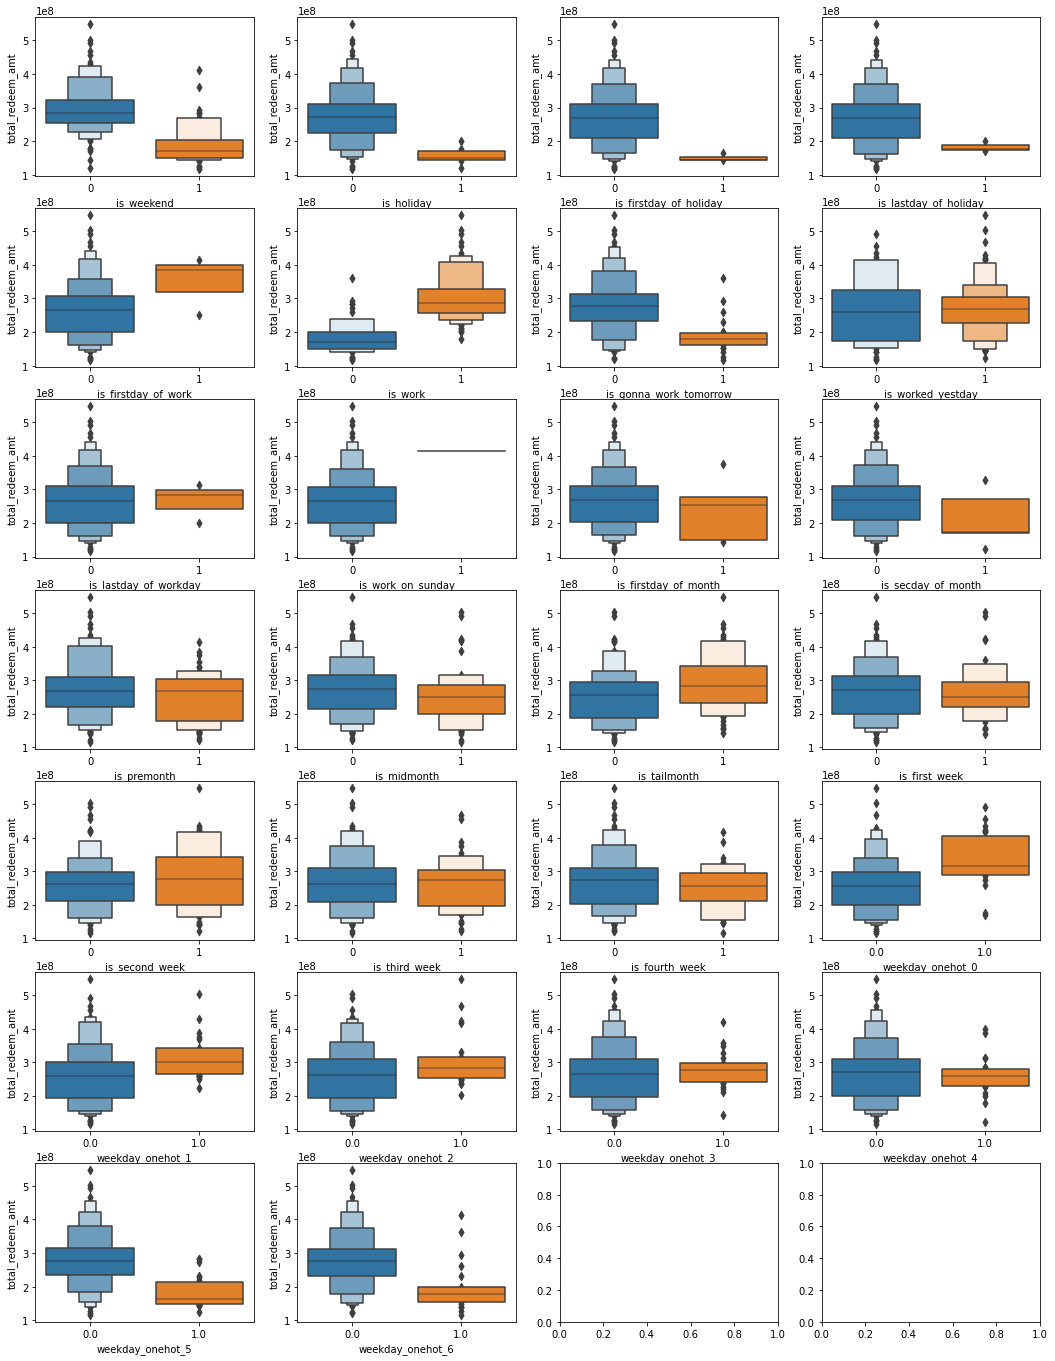

In [36]:
draw_boxplot(data_redeem_is)

In [454]:
## 剔除看起来较差的特征 (for_rate)

redeem_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_work_on_sunday',
      'is_weekend'
]

In [37]:
## 剔除看起来较差的特征

redeem_feature_seems_useless = [
      #样本量太少，建模时无效；但若确定这是一个有用规则，可以对结果做修正
      'is_work_on_sunday'
]

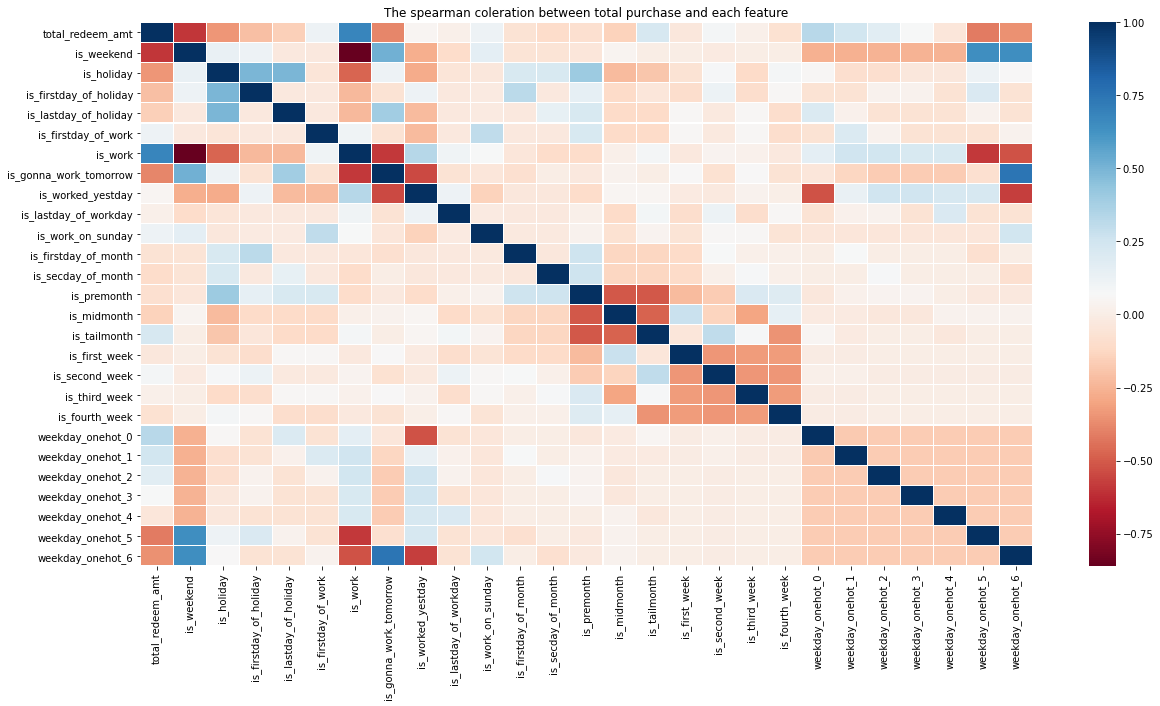

In [38]:
# 画相关性热力图

def draw_correlation_heatmap(data: pd.DataFrame, way:str = 'pearson')->None:
    feature = data.copy()
    plt.figure(figsize=(20,10))
    plt.title('The ' + way +' coleration between total purchase and each feature')
    sns.heatmap(feature[[x for x in feature.columns if x not in ['total_purchase_amt', 'date'] ]].corr(way),linecolor='white',
        linewidths=0.1,
        cmap="RdBu")

draw_correlation_heatmap(data_redeem_is, 'spearman')

# 剔除相关性较低的特征

temp = np.abs(data_redeem_is[[x for x in data_redeem_is.columns 
                       if x not in ['total_purchase_amt', 'date'] ]].corr('spearman')['total_redeem_amt'])
redeem_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [39]:
redeem_feature_low_correlation

['is_firstday_of_month',
 'is_third_week',
 'weekday_onehot_4',
 'is_premonth',
 'is_first_week',
 'is_worked_yestday',
 'is_lastday_of_workday',
 'weekday_onehot_3',
 'is_second_week',
 'is_fourth_week']

In [40]:
data_redeem_is_drop = data_redeem_is[[x for x in data_redeem_is.columns 
                   if (x not in redeem_feature_low_correlation + redeem_feature_seems_useless)]]

#### 线性模型测试在八月份效果（线下）

In [41]:
trainset, testset = split_data_underline(data_purchase_is_drop)
result_purchase_lr = generate_under_result(data_purchase_is_drop, [x for x in data_purchase_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_drop, [x for x in data_redeem_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [42]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

182.28000045386256

####  在各模型下测试各阶段效果（线下）

In [43]:
add_two_df(multi_model_eva(data_purchase_is_drop, 'purchase'), multi_model_eva(data_redeem_is_drop, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,182.280000,174.792397,181.818438,178.523971,172.420516,176.940554
1,2014-07-25,172.715186,169.177166,168.810842,173.963384,166.869481,175.197579
2,2014-07-18,184.431027,186.499141,187.509542,188.350141,186.205475,188.684867
3,2014-07-11,184.970138,183.599271,184.462006,185.766583,183.128205,185.972376
4,2014-07-04,175.942544,170.623294,173.224767,171.471233,174.403220,170.373967
5,2014-06-27,177.423874,176.049670,176.662658,175.032549,169.478346,175.241555
6,2014-06-20,166.499500,167.471805,169.658516,168.331171,164.361402,167.045438


#### 九月份预测

In [461]:
result_purchase_lr = generate_online_result(data_purchase_is_drop, [x for x in data_purchase_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_drop, [x for x in data_redeem_is_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [66]:
trainset, testset = split_data_online(data_purchase_is_drop)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_drop_predict.csv',index=False,header=None)

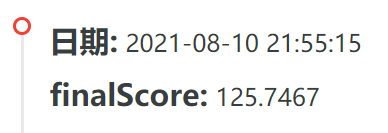

## 增加dis_特征

### dis特征分析（特征筛选）

In [44]:
data_purchase_dis_feature = [x for x in data_purchase.columns if (x not in date_indexs + labels + ['date']) & ('dis' in x)]

In [45]:
data_redeem_dis_feature = [x for x in data_redeem.columns if (x not in date_indexs + labels + ['date']) & ('dis' in x)]

In [46]:
data_purchase_dis = data_purchase[['total_purchase_amt']+data_purchase_dis_feature]
data_redeem_dis = data_redeem[['total_redeem_amt']+data_redeem_dis_feature]

In [47]:
data_purchase_dis.head()

,total_purchase_amt,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_to_holiday,dis_from_holiday,dis_to_holiendday,dis_from_holiendday,dis_from_startofmonth,dis_from_middleofmonth,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
0,453320585.0,4,2,0,0,4,2,10,2,1,10,2,5,0,5
1,355347118.0,3,3,0,0,3,3,5,3,2,10,1,4,1,4
2,363877120.0,2,4,0,0,2,4,4,4,3,10,0,3,2,3
3,251895894.0,1,5,0,0,1,5,3,5,4,10,1,2,3,2
4,202336542.0,0,0,3,1,0,0,2,10,5,10,2,1,4,1


#### purchase

In [48]:
# 画点线

def draw_point_feature(data: pd.DataFrame)->None:
    feature = data.copy()
    f, axes = plt.subplots(data.shape[1] // 3, 3, figsize=(30, data.shape[1] // 3 * 4))
    count = 0
    for i in [x for x in feature.columns if (x not in date_indexs + labels + ['date'])]:
        sns.pointplot(x=i, y="total_purchase_amt",
                markers=["^", "o"], linestyles=["-", "--"],
                kind="point", data=feature, ax=axes[count // 3][count % 3] if data.shape[1] > 3 else axes[count])
        count += 1

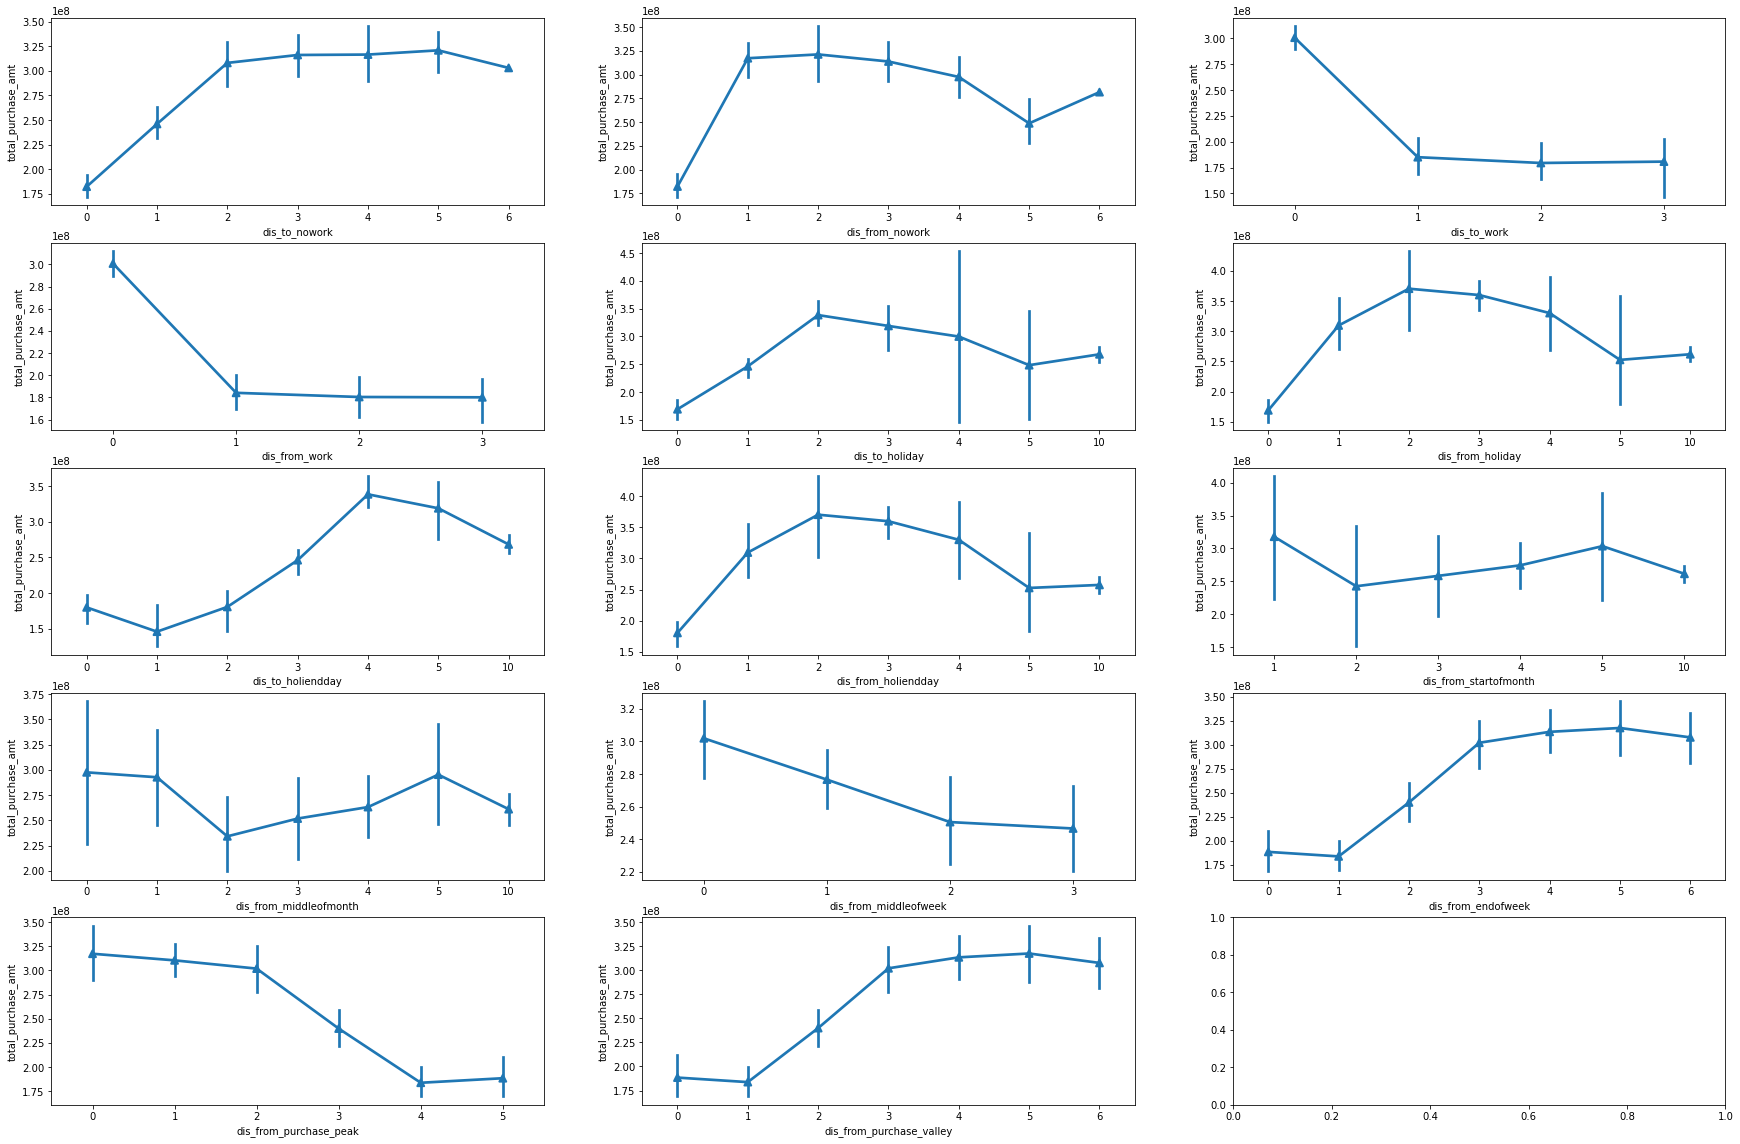

In [49]:
draw_point_feature(data_purchase_dis)

In [50]:
## 剔除看起来用处不大的特征
purchase_feature_seems_useless = [
                                  #即使做了处理，但方差太大，不可信，规律不明显
                                  'dis_to_holiday',
                                  #方差太大，不可信
                                  'dis_from_startofmonth',
                                  #方差太大，不可信
                                  'dis_from_middleofmonth'
]

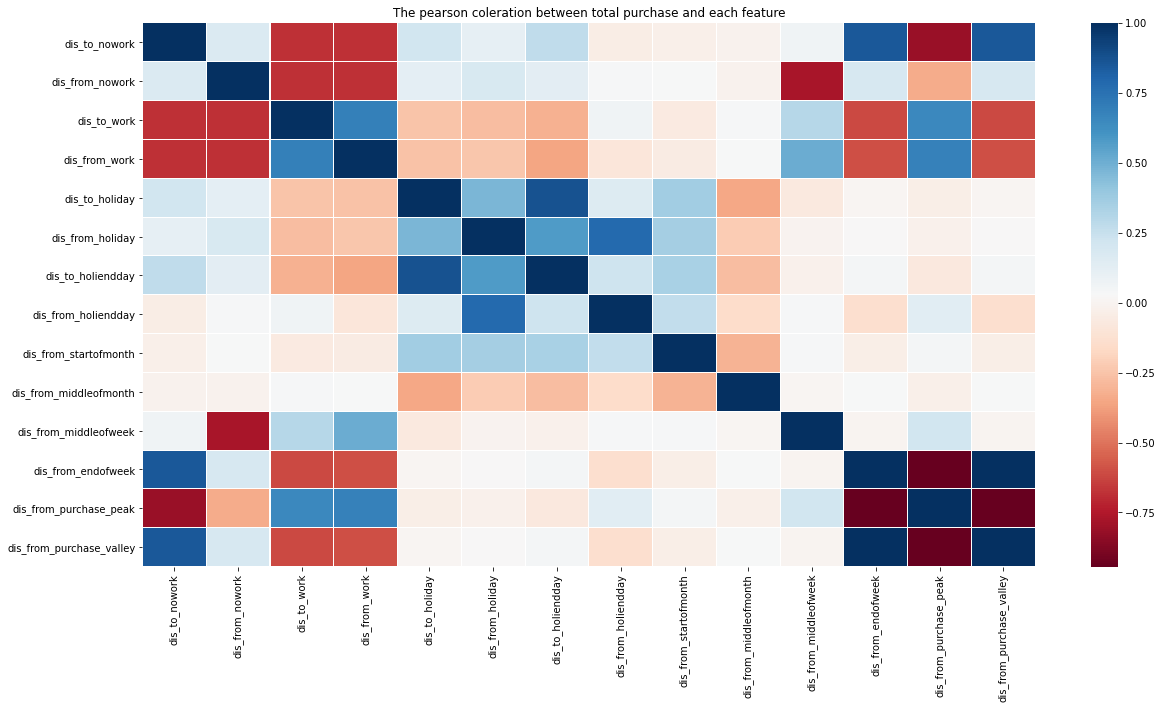

In [51]:
# 画出相关性图

draw_correlation_heatmap(data_purchase[['total_purchase_amt']+data_purchase_dis_feature])

In [52]:
# 剔除相关性较差的特征

temp = np.abs(data_purchase_dis[[x for x in data_purchase_dis.columns 
                       if ('dis' in x) | (x in ['total_purchase_amt']) ]].corr()['total_purchase_amt'])
purchase_feature_low_correlation = list(set(temp[temp < 0.1].index) )

In [53]:
purchase_feature_low_correlation

['dis_from_holiday', 'dis_from_startofmonth', 'dis_from_middleofmonth']

#### redeem

In [54]:
# 画点线

def draw_point_feature(data: pd.DataFrame)->None:
    feature = data.copy()
    f, axes = plt.subplots(data.shape[1] // 3, 3, figsize=(30, data.shape[1] // 3 * 4))
    count = 0
    for i in [x for x in feature.columns if (x not in date_indexs + labels + ['date'])]:
        sns.pointplot(x=i, y="total_redeem_amt",
                markers=["^", "o"], linestyles=["-", "--"],
                kind="point", data=feature, ax=axes[count // 3][count % 3] if data.shape[1] > 3 else axes[count])
        count += 1

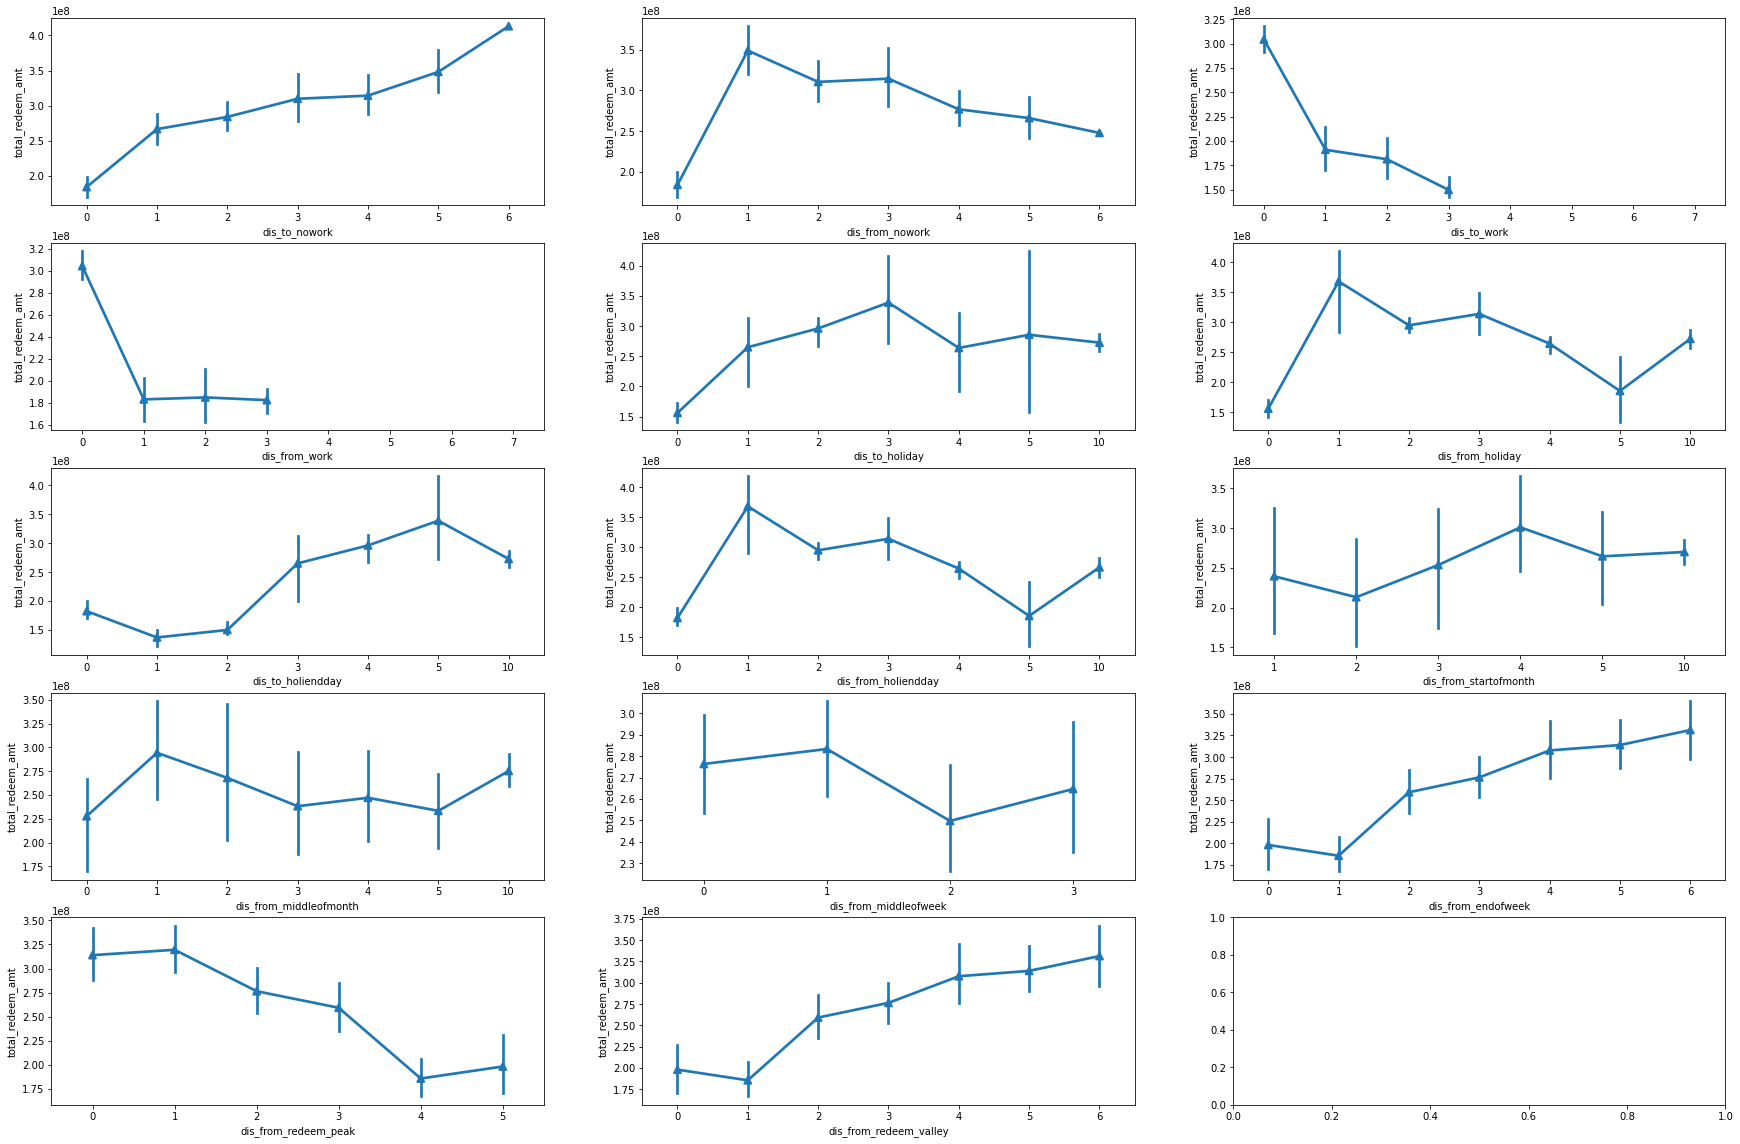

In [55]:
# 画处理后的点线图

draw_point_feature(data_redeem_dis)

In [56]:
## 剔除看起来用处不大的特征
redeem_feature_seems_useless = [
                                  #即使做了处理，但方差太大，不可信，规律不明显
                                  'dis_to_holiday',
                                  #方差太大，不可信
                                  'dis_from_startofmonth',
                                  #方差太大，不可信
                                  'dis_from_middleofmonth',
                                  'dis_from_middleofweek'
]

In [57]:
# 剔除相关性较差的特征

temp = np.abs(data_redeem_dis[[x for x in data_redeem_dis.columns 
                       if ('dis' in x) | (x in ['total_redeem_amt']) ]].corr()['total_redeem_amt'])
redeem_feature_low_correlation = list(set(temp[temp < 0.1].index) )

In [58]:
redeem_feature_low_correlation

['dis_from_startofmonth',
 'dis_from_holiendday',
 'dis_from_middleofmonth',
 'dis_from_middleofweek']

In [59]:
data_purchase_dis_drop = data_purchase_dis[[x for x in data_purchase_dis.columns 
                   if (x not in purchase_feature_low_correlation + purchase_feature_seems_useless)]]

In [60]:
data_redeem_dis_drop = data_redeem_dis[[x for x in data_redeem_dis.columns 
                   if (x not in redeem_feature_low_correlation + redeem_feature_seems_useless)]]

#### 仅用dis的效果

In [481]:
data_purchase_dis_drop['date'] = data_purchase['date']
data_redeem_dis_drop['date'] = data_redeem['date']

In [482]:
data_purchase_dis_drop['total_redeem_amt'] = data_purchase['total_redeem_amt']

##### 线性模型在八月份的效果

In [483]:
trainset, testset = split_data_underline(data_purchase_dis_drop)
result_purchase_lr = generate_under_result(data_purchase_dis_drop, [x for x in data_purchase_dis_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_dis_drop, [x for x in data_redeem_dis_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [484]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

173.23331571291735

##### 各种模型在不同时间段的效果

In [485]:
add_two_df(multi_model_eva(data_purchase_dis_drop, 'purchase'), multi_model_eva(data_redeem_dis_drop, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,173.233316,171.655980,179.501222,182.549744,172.433438,173.656011
1,2014-07-25,157.174331,154.372167,169.022178,166.729701,164.660852,160.312007
2,2014-07-18,170.695496,169.114353,178.504111,176.647948,172.311331,171.517213
3,2014-07-11,173.917650,163.242597,170.364540,170.584571,165.724302,165.518972
4,2014-07-04,167.302233,170.734113,171.400096,164.969568,168.112725,170.439698
5,2014-06-27,184.330633,172.226287,179.556195,174.659235,176.816882,174.465735
6,2014-06-20,169.344369,166.762741,171.828072,164.535657,164.536935,168.730116


##### 九月份预测

In [486]:
result_purchase_lr = generate_online_result(data_purchase_dis_drop, [x for x in data_purchase_dis_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_dis_drop, [x for x in data_redeem_dis_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [102]:
trainset, testset = split_data_online(data_purchase_dis_drop)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_dis_drop_predict.csv',index=False,header=None)

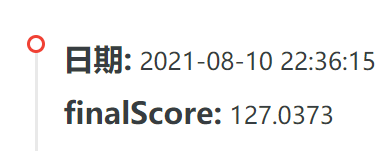

#### is+dis的效果

In [61]:
data_purchase_is_drop.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,is_tailmonth,is_second_week,is_third_week,weekday_onehot_0,weekday_onehot_1,weekday_onehot_2,weekday_onehot_3,weekday_onehot_4,weekday_onehot_5,weekday_onehot_6
0,2014-04-01,453320585.0,277429358.0,0,0,0,0,1,0,0,...,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2014-04-02,355347118.0,272612066.0,0,0,0,0,1,0,1,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2014-04-03,363877120.0,266605457.0,0,0,0,0,1,0,1,...,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2014-04-04,251895894.0,200192637.0,0,0,0,0,1,0,1,...,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,1,...,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
data_purchase_dis_drop.head()

,total_purchase_amt,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_to_holiendday,dis_from_holiendday,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
0,453320585.0,4,2,0,0,10,2,2,5,0,5
1,355347118.0,3,3,0,0,5,3,1,4,1,4
2,363877120.0,2,4,0,0,4,4,0,3,2,3
3,251895894.0,1,5,0,0,3,5,1,2,3,2
4,202336542.0,0,0,3,1,2,10,2,1,4,1


In [65]:
data_purchase_is_dis = pd.concat([data_purchase_is_drop,data_purchase_dis_drop.iloc[:,1:]],axis=1)

In [66]:
data_purchase_is_dis.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_to_holiendday,dis_from_holiendday,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley
0,2014-04-01,453320585.0,277429358.0,0,0,0,0,1,0,0,...,4,2,0,0,10,2,2,5,0,5
1,2014-04-02,355347118.0,272612066.0,0,0,0,0,1,0,1,...,3,3,0,0,5,3,1,4,1,4
2,2014-04-03,363877120.0,266605457.0,0,0,0,0,1,0,1,...,2,4,0,0,4,4,0,3,2,3
3,2014-04-04,251895894.0,200192637.0,0,0,0,0,1,0,1,...,1,5,0,0,3,5,1,2,3,2
4,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,1,...,0,0,3,1,2,10,2,1,4,1


In [67]:
data_redeem_is_dis = pd.concat([data_redeem_is_drop,data_redeem_dis_drop.iloc[:,1:]],axis=1)

In [68]:
data_redeem_is_dis.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,weekday_onehot_6,dis_to_nowork,dis_from_nowork,dis_to_work,dis_from_work,dis_from_holiday,dis_to_holiendday,dis_from_endofweek,dis_from_redeem_peak,dis_from_redeem_valley
0,2014-03-31,398884905.0,423852634.0,0,0,0,0,0,1,0,...,0.0,5,1,0,0,1,10,6,1,6
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,0.0,4,2,0,0,2,10,5,0,5
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,0.0,3,3,0,0,3,5,4,1,4
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,0.0,2,4,0,0,4,4,3,2,3
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,0.0,1,5,0,0,5,3,2,3,2


In [69]:
trainset, testset = split_data_underline(data_purchase_is_dis)
result_purchase_lr = generate_under_result(data_purchase_is_dis, [x for x in data_purchase_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis, [x for x in data_redeem_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [70]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

181.37135482450583

In [117]:
add_two_df(multi_model_eva(data_purchase_is_dis, 'purchase'), multi_model_eva(data_redeem_is_dis, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,181.371355,175.454450,182.236887,178.087431,186.189742,171.763989
1,2014-07-25,172.121908,167.354851,171.539529,169.184322,173.042036,166.650950
2,2014-07-18,184.957322,181.002949,184.020375,181.995811,182.829804,180.584800
3,2014-07-11,184.150874,174.455959,177.408181,179.170545,179.946173,173.880464
4,2014-07-04,173.567769,162.329413,166.283255,169.392834,175.150923,164.496738
5,2014-06-27,172.762085,163.406045,171.975486,171.426105,176.340547,168.255826
6,2014-06-20,152.562952,155.033684,160.294323,158.508116,154.298896,158.578252


LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')

##### linear

In [118]:
result_purchase_lr = generate_online_result(data_purchase_is_dis, [x for x in data_purchase_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis, [x for x in data_redeem_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [119]:
trainset, testset = split_data_online(data_purchase_is_dis)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_dis_predict.csv',index=False,header=None)

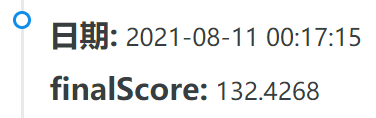

##### DecisionTreeRegressor

In [120]:
result_purchase_lr = generate_online_result(data_purchase_is_dis, [x for x in data_purchase_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], DecisionTreeRegressor(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis, [x for x in data_redeem_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], DecisionTreeRegressor(),'total_redeem_amt')

In [121]:
trainset, testset = split_data_online(data_purchase_is_dis)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_dis_dt_predict.csv',index=False,header=None)

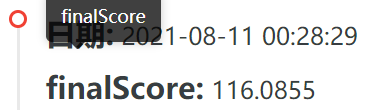

In [122]:
result_purchase_lr = generate_online_result(data_purchase_is_dis, [x for x in data_purchase_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], RandomForestRegressor(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis, [x for x in data_redeem_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], RandomForestRegressor(),'total_redeem_amt')

In [123]:
trainset, testset = split_data_online(data_purchase_is_dis)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_dis_rt_predict.csv',index=False,header=None)

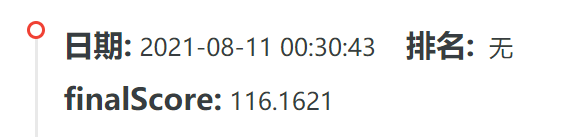

In [124]:
result_purchase_lr = generate_online_result(data_purchase_is_dis, [x for x in data_purchase_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], MLPRegressor(solver='lbfgs'),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis, [x for x in data_redeem_is_dis.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], MLPRegressor(solver='lbfgs'),'total_redeem_amt')

In [125]:
trainset, testset = split_data_online(data_purchase_is_dis)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_dis_xgb_predict.csv',index=False,header=None)

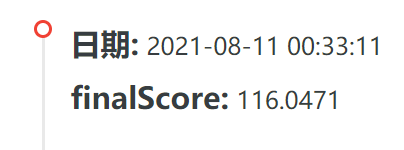

## 增加周期特征

### is+dis+rate特征

In [141]:
weekrate = [x for x in data_purchase.columns if 'rate' in x and 'purchase' in x ]

In [142]:
weekrate

['purchase_weekdayrate', 'purchase_dayrate']

In [143]:
data_purchase_is_dis_rate = pd.concat([data_purchase_is_dis,data_purchase[weekrate]],axis=1)

In [144]:
data_purchase_is_dis_rate.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_to_work,dis_from_work,dis_to_holiendday,dis_from_holiendday,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley,purchase_weekdayrate,purchase_dayrate
0,2014-03-31,398884905.0,423852634.0,0,0,0,0,1,0,0,...,0,0,10,1,3,6,1,6,1.142120,1.142600
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,1,0,0,...,0,0,10,2,2,5,0,5,1.273349,1.710632
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,1,0,1,...,0,0,5,3,1,4,1,4,1.093144,1.572264
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,1,0,1,...,0,0,4,4,0,3,2,3,1.149968,0.936909
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,1,0,1,...,0,0,3,5,1,2,3,2,0.899730,0.706586


In [145]:
redeem_weekrate = [x for x in data_redeem.columns if 'rate' in x and 'redeem' in x ]

In [146]:
redeem_weekrate

['redeem_weekdayrate', 'redeem_dayrate']

In [147]:
data_redeem_is_dis_rate = pd.concat([data_redeem_is_dis,data_redeem[redeem_weekrate]],axis=1)

In [148]:
data_redeem_is_dis_rate.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,dis_from_nowork,dis_to_work,dis_from_work,dis_from_holiday,dis_to_holiendday,dis_from_endofweek,dis_from_redeem_peak,dis_from_redeem_valley,redeem_weekdayrate,redeem_dayrate
0,2014-03-31,398884905.0,423852634.0,0,0,0,0,0,1,0,...,1,0,0,1,10,6,1,6,1.008503,1.008389
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,2,0,0,2,10,5,0,5,1.161819,2.069919
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,3,0,0,3,5,4,1,4,1.189935,1.453653
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,4,0,0,4,4,3,2,3,0.992409,0.738965
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,5,0,0,5,3,2,3,2,1.002284,0.862685


In [149]:
trainset, testset = split_data_underline(data_purchase_is_dis_rate)
result_purchase_lr = generate_under_result(data_purchase_is_dis_rate, [x for x in data_purchase_is_dis_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis_rate, [x for x in data_redeem_is_dis_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [150]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

179.39012227364944

In [151]:
add_two_df(multi_model_eva(data_purchase_is_dis_rate, 'purchase'), multi_model_eva(data_redeem_is_dis_rate, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,179.390122,149.742659,174.149405,173.443385,183.528788,165.055800
1,2014-07-25,169.464307,162.016726,172.676387,171.693107,167.430953,163.910844
2,2014-07-18,183.306246,170.249287,184.780931,184.868668,185.471434,173.486830
3,2014-07-11,181.301139,158.950298,174.014676,174.994094,173.957762,168.401918
4,2014-07-04,170.015950,148.766255,164.048343,159.995031,172.193800,154.090750
5,2014-06-27,170.510903,145.060708,171.971299,165.940396,175.116930,161.337486
6,2014-06-20,151.705387,165.101111,163.188900,156.451356,150.522601,147.940382


In [152]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_rate, [x for x in data_purchase_is_dis_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_rate, [x for x in data_redeem_is_dis_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [153]:
trainset, testset = split_data_online(data_purchase_is_dis_rate)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210810_is_dis_rate2_linear_predict.csv',index=False,header=None)

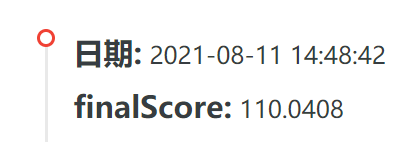

> 加上周期特征效果反而变差了

### 仅用周期特征

In [155]:
data_purchase_rate = data_purchase[weekrate+['date']+labels]

In [156]:
data_purchase_rate.head()

,purchase_weekdayrate,purchase_dayrate,date,total_purchase_amt,total_redeem_amt
0,1.142120,1.142600,2014-03-31,398884905.0,423852634.0
1,1.273349,1.710632,2014-04-01,453320585.0,277429358.0
2,1.093144,1.572264,2014-04-02,355347118.0,272612066.0
3,1.149968,0.936909,2014-04-03,363877120.0,266605457.0
4,0.899730,0.706586,2014-04-04,251895894.0,200192637.0


In [157]:
data_redeem_rate = data_redeem[redeem_weekrate+['date']+labels]

In [158]:
trainset, testset = split_data_underline(data_purchase_rate)
result_purchase_lr = generate_under_result(data_purchase_rate, [x for x in data_purchase_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_rate, [x for x in data_redeem_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [159]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

191.92226747079837

In [161]:
add_two_df(multi_model_eva(data_purchase_rate, 'purchase'), multi_model_eva(data_redeem_rate, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,191.922267,169.415311,176.803149,177.778647,192.937155,173.974036
1,2014-07-25,173.756988,156.857304,167.392126,155.450845,174.167222,154.894789
2,2014-07-18,177.697111,160.577125,172.584110,164.296280,179.333663,164.385196
3,2014-07-11,174.990370,170.211537,174.685449,172.198403,177.795734,172.613361
4,2014-07-04,175.579099,166.315256,169.358846,164.210289,175.619816,164.705214
5,2014-06-27,178.432980,156.601007,170.175923,160.148136,178.220182,167.389935
6,2014-06-20,173.879064,166.866410,171.126811,168.142136,174.212776,172.590587


In [ ]:
result_purchase_lr = generate_online_result(data_purchase_rate, [x for x in data_purchase_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_rate, [x for x in data_redeem_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [162]:
trainset, testset = split_data_online(data_purchase_rate)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_rate_linear_predict.csv',index=False,header=None)

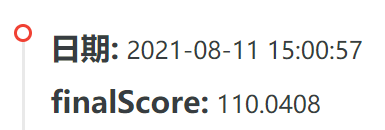

估计有了周期因子特征后，其他特征不起作用了。

## 增加时序特征

### 仅用时序特征

In [71]:
data_purchase_time = pd.concat([data_purchase[['date']+labels],data_purchase.iloc[:,-6:]],axis=1) 

In [72]:
data_purchase_time.head()

,date,total_purchase_amt,total_redeem_amt,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-04-01,453320585.0,277429358.0,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-02,355347118.0,272612066.0,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-03,363877120.0,266605457.0,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-04,251895894.0,200192637.0,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-05,202336542.0,163199682.0,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [73]:
data_redeem_time = pd.concat([data_redeem[['date']+labels],data_redeem.iloc[:,-6:]],axis=1) 

In [74]:
trainset, testset = split_data_underline(data_purchase_time)
result_purchase_lr = generate_under_result(data_purchase_time, [x for x in data_purchase_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_time, [x for x in data_redeem_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [75]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

185.38303345210082

In [171]:
add_two_df(multi_model_eva(data_purchase_time, 'purchase'), multi_model_eva(data_redeem_time, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,185.383033,147.947934,180.234066,167.868732,194.718899,161.207467
1,2014-07-25,172.558942,135.280086,150.717537,151.771962,171.196069,132.864302
2,2014-07-18,177.343956,138.431555,174.087771,172.573002,173.783247,163.681641
3,2014-07-11,171.562149,162.017609,163.653060,159.796091,183.240641,160.312090
4,2014-07-04,171.515692,147.152716,149.654931,149.516772,172.936213,153.201998
5,2014-06-27,180.848316,145.763159,160.696671,153.857334,168.353032,154.114766
6,2014-06-20,175.075396,140.555809,169.565249,163.075277,166.675390,156.079310


In [173]:
result_purchase_lr = generate_online_result(data_purchase_time, [x for x in data_purchase_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_time, [x for x in data_redeem_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [174]:
trainset, testset = split_data_online(data_purchase_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_time_linear_predict.csv',index=False,header=None)

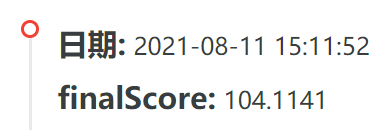

### 时序特征分析

#### purchase

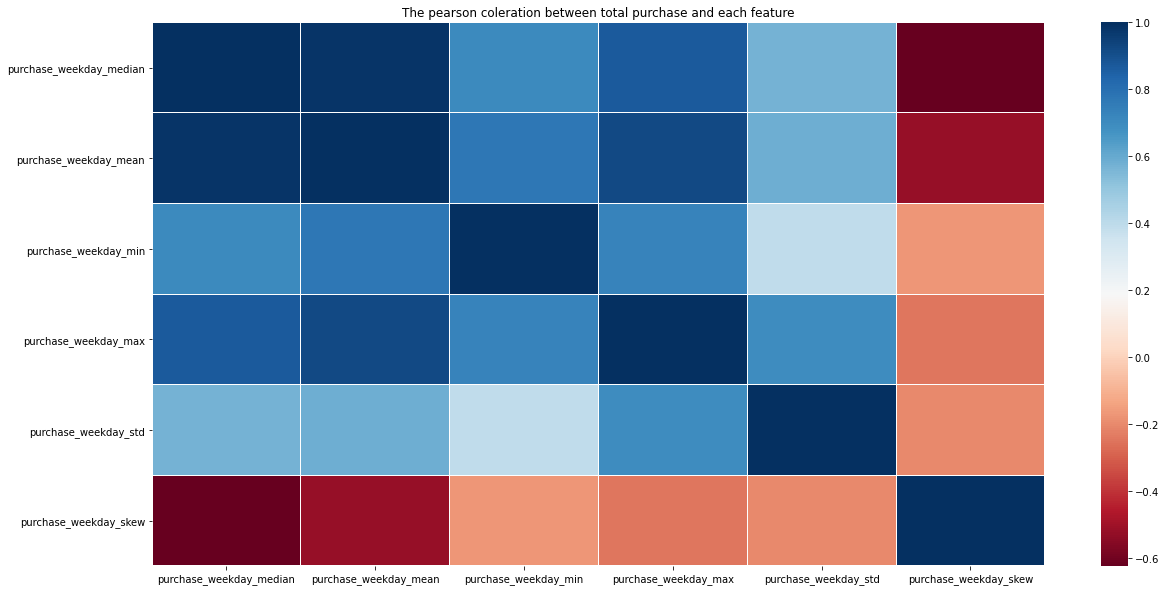

In [76]:
# 绘制动态特征的相关性图

draw_correlation_heatmap(data_purchase_time[['total_purchase_amt'] + 
                                      ['purchase_weekday_median',
                                      'purchase_weekday_mean','purchase_weekday_min',
                                       'purchase_weekday_max','purchase_weekday_std',
                                       'purchase_weekday_skew'
                                      ]])

In [77]:
temp = np.abs(data_purchase_time[[x for x in data_purchase_time.columns 
                       if x not in ['total_redeem_amt', 'date'] ]].corr('spearman')['total_purchase_amt'])
purchase_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [78]:
purchase_feature_low_correlation

[]

#### redeem

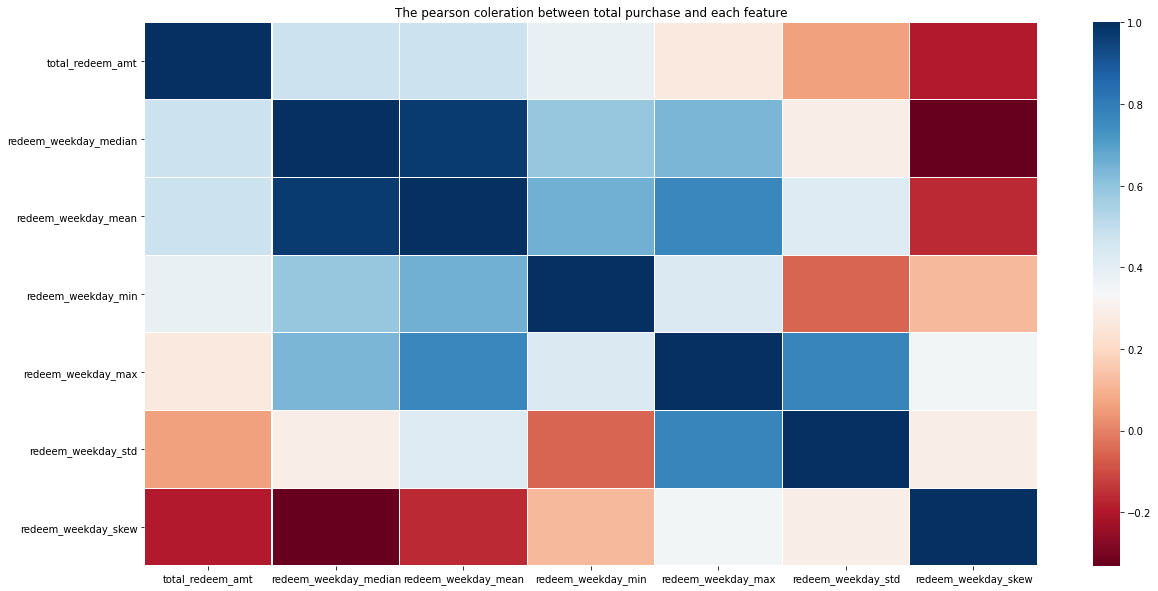

In [79]:
# 绘制动态特征的相关性图

draw_correlation_heatmap(data_redeem_time[['total_redeem_amt'] + 
                                      ['redeem_weekday_median',
                                      'redeem_weekday_mean','redeem_weekday_min',
                                       'redeem_weekday_max','redeem_weekday_std',
                                       'redeem_weekday_skew'
                                      ]])

In [80]:
temp = np.abs(data_redeem_time[[x for x in data_redeem_time.columns 
                       if x not in ['total_purchase_amt', 'date'] ]].corr('spearman')['total_redeem_amt'])
redeem_feature_low_correlation = list(set(temp[temp < 0.1].index))

In [81]:
redeem_feature_low_correlation

['redeem_weekday_std']

### is+dis+time特征

In [82]:
data_purchase_is_dis_time = pd.concat([data_purchase_is_dis,data_purchase_time[ 
                                      ['purchase_weekday_median',
                                      'purchase_weekday_mean','purchase_weekday_min',
                                       'purchase_weekday_max','purchase_weekday_std',
                                       'purchase_weekday_skew'
                                      ]]],axis=1)

In [83]:
data_purchase_is_dis_time.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-04-01,453320585.0,277429358.0,0,0,0,0,1,0,0,...,2,5,0,5,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-02,355347118.0,272612066.0,0,0,0,0,1,0,1,...,1,4,1,4,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-03,363877120.0,266605457.0,0,0,0,0,1,0,1,...,0,3,2,3,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-04,251895894.0,200192637.0,0,0,0,0,1,0,1,...,1,2,3,2,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-05,202336542.0,163199682.0,1,1,1,0,0,0,1,...,2,1,4,1,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [84]:
data_redeem_is_dis_time = pd.concat([data_redeem_is_dis,data_redeem_time[ 
                                      ['redeem_weekday_median',
                                      'redeem_weekday_mean','redeem_weekday_min',
                                       'redeem_weekday_max',
                                       'redeem_weekday_skew'
                                      ]]],axis=1)

In [89]:
data_redeem_is_dis_time.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_firstday_of_work,is_work,is_gonna_work_tomorrow,...,dis_from_holiday,dis_to_holiendday,dis_from_endofweek,dis_from_redeem_peak,dis_from_redeem_valley,redeem_weekday_median,redeem_weekday_mean,redeem_weekday_min,redeem_weekday_max,redeem_weekday_skew
0,2014-03-31,398884905.0,423852634.0,0,0,0,0,0,1,0,...,1,10,6,1,6,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,0,1,0,...,2,10,5,0,5,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,0,1,0,...,3,5,4,1,4,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,0,1,0,...,4,4,3,2,3,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,0,1,0,...,5,3,2,3,2,273187499.0,2.739258e+08,143362755.0,413222034.0,0.874362


In [87]:
data_purchase_is_dis_time.to_csv("data_purchase_is_dis_time.csv",index=False)

In [88]:
data_redeem_is_dis_time.to_csv("data_redeem_is_dis_time.csv",index=False)

In [85]:
trainset, testset = split_data_underline(data_purchase_is_dis_time)
result_purchase_lr = generate_under_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [86]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

176.96134648288762

In [191]:
add_two_df(multi_model_eva(data_purchase_is_dis_time, 'purchase'), multi_model_eva(data_redeem_is_dis_time, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,176.961346,153.203318,176.335778,180.586673,192.244794,173.232508
1,2014-07-25,167.956154,149.046957,159.617443,162.318389,182.528059,168.109335
2,2014-07-18,182.006209,163.357373,173.300422,182.727715,188.701263,171.764739
3,2014-07-11,172.223669,162.492653,176.059959,186.330532,180.909547,184.982140
4,2014-07-04,154.218993,155.878532,154.986866,159.062547,176.568444,149.124603
5,2014-06-27,163.455907,149.307547,162.738163,149.623962,170.812820,150.190348
6,2014-06-20,150.160793,155.245468,168.395995,156.553854,173.464396,165.457591


LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')

#### linear

In [192]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

In [193]:
trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_linear_predict.csv',index=False,header=None)

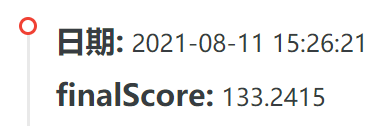

#### mlp

In [194]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],MLPRegressor(solver='lbfgs'),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], MLPRegressor(solver='lbfgs'),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_mlp_predict.csv',index=False,header=None)

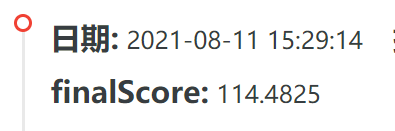

又过拟合了。

#### DecisionTree

In [195]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],DecisionTreeRegressor(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], DecisionTreeRegressor(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_dt_predict.csv',index=False,header=None)

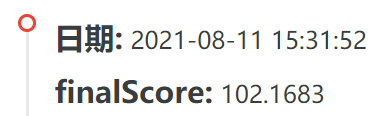

#### GBDT

In [196]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],GradientBoostingRegressor(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], GradientBoostingRegressor(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_gbdt_predict.csv',index=False,header=None)

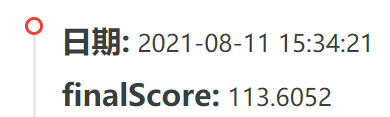

#### RandomForest

In [197]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time, [x for x in data_purchase_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],RandomForestRegressor(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time, [x for x in data_redeem_is_dis_time.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], RandomForestRegressor(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_rt_predict.csv',index=False,header=None)

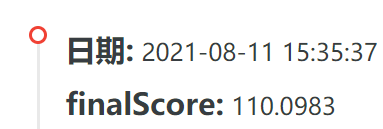

## is+dis+time+rate

In [263]:
data_purchase_is_dis_time_rate = pd.concat([data_purchase_is_dis_time,data_purchase['purchase_dayrate']],axis=1)

In [264]:
data_redeem_is_dis_time_rate = pd.concat([data_redeem_is_dis_time,data_redeem['redeem_dayrate']],axis=1)

In [265]:
trainset, testset = split_data_underline(data_purchase_is_dis_time_rate)
result_purchase_lr = generate_under_result(data_purchase_is_dis_time_rate, [x for x in data_purchase_is_dis_time_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis_time_rate, [x for x in data_redeem_is_dis_time_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [266]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

174.29934324215185

In [267]:
add_two_df(multi_model_eva(data_purchase_is_dis_time_rate, 'purchase'), multi_model_eva(data_redeem_is_dis_time_rate, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,174.299343,147.769812,172.884881,168.701536,193.062565,175.680157
1,2014-07-25,164.770969,168.671086,157.642059,163.126647,182.948381,165.917948
2,2014-07-18,178.791503,151.352278,176.749694,186.155665,166.130014,182.559509
3,2014-07-11,165.982863,175.446258,170.922725,185.814103,184.092243,187.356888
4,2014-07-04,147.700481,154.539267,153.171219,161.265750,172.049052,156.199434
5,2014-06-27,161.241313,136.226963,163.409932,154.161619,164.136277,152.866640
6,2014-06-20,153.204951,154.576020,165.464700,162.592729,168.478991,163.293213


In [268]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_rate, [x for x in data_purchase_is_dis_time_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_rate, [x for x in data_redeem_is_dis_time_rate.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_rate)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_rate_linear_predict.csv',index=False,header=None)

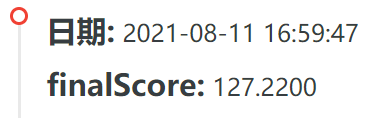

## 特征筛选和组合

###  剔除复共线特征

#### purchase

In [199]:
data_purchase_is_dis_time_modify = data_purchase_is_dis_time[[x for x in data_purchase_is_dis_time.columns 
                   if x not in ['date','total_redeem_amt'] ]]

In [201]:
purchase_cors = data_purchase_is_dis_time_modify.corr()
purchase_cors['total_purchase_amt'] = np.abs(purchase_cors['total_purchase_amt'])
feature_lists = list(purchase_cors.sort_values(by='total_purchase_amt',ascending=False).index)[1:]

In [207]:
# 这里要注意 保留的时候按照相关性降序排序 剔除按照相关性升序排序的顺序
def delete_common_feature(feature_temp,feature_lists):
    thershold = 0.8
    for i in range(len(feature_lists)):
        for k in range(len(feature_lists)-1, -1, -1):
            if i >= len(feature_lists) or k >= len(feature_lists) or i == k:
                break
            if np.abs(np.corrcoef(feature_temp[feature_lists[i]], feature_temp[feature_lists[k]])[0][1]) > thershold:
                higher_feature_temp = feature_temp[feature_lists[i]] * feature_temp[feature_lists[k]]
                if np.abs(np.corrcoef(feature_temp[feature_lists[i]], higher_feature_temp)[0][1]) <= thershold: # 特征组合
                    name = str(feature_lists[i]) + '%%%%' + str(feature_lists[k])
                    feature_temp[name] = higher_feature_temp
                    feature_lists.append(name)
                feature_temp = feature_temp.drop(feature_lists[k], axis=1) # 删除复共线性特征
                feature_lists.remove(feature_lists[k])
    return feature_temp,feature_lists

In [208]:
data_purchase_is_dis_time_modify,feature_lists = delete_common_feature(data_purchase_is_dis_time_modify,feature_lists)

#### redeem

In [203]:
data_redeem_is_dis_time_modify = data_redeem_is_dis_time[[x for x in data_redeem_is_dis_time.columns 
                   if x not in ['date','total_purchase_amt'] ]]

In [204]:
redeem_cors = data_redeem_is_dis_time_modify.corr()
redeem_cors['total_purchase_amt'] = np.abs(redeem_cors['total_redeem_amt'])
redeem_feature_lists = list(redeem_cors.sort_values(by='total_redeem_amt',ascending=False).index)[1:]

In [210]:
data_redeem_is_dis_time_modify,redeem_feature_lists = delete_common_feature(data_redeem_is_dis_time_modify,redeem_feature_lists)

In [212]:
len(redeem_feature_lists)

26

In [215]:
data_purchase_is_dis_time_modify['date'] = data_purchase['date']

data_redeem_is_dis_time_modify['date'] = data_redeem['date']

In [219]:
data_purchase_is_dis_time_modify['total_redeem_amt'] = data_redeem_is_dis_time_modify['total_redeem_amt']
data_redeem_is_dis_time_modify['total_purchase_amt'] = data_purchase_is_dis_time_modify['total_purchase_amt']

#### 模型测试

In [220]:
trainset, testset = split_data_underline(data_purchase_is_dis_time_modify)
result_purchase_lr = generate_under_result(data_purchase_is_dis_time_modify, [x for x in data_purchase_is_dis_time_modify.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis_time_modify, [x for x in data_redeem_is_dis_time_modify.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [222]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

181.41179121846034

In [223]:
add_two_df(multi_model_eva(data_purchase_is_dis_time_modify, 'purchase'), multi_model_eva(data_redeem_is_dis_time_modify, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,181.411791,165.647518,185.855988,185.757854,175.338741,188.095358
1,2014-07-25,169.078773,153.116550,166.044794,172.730555,159.411139,162.937095
2,2014-07-18,182.654170,160.965098,174.389680,176.306851,157.448653,169.080895
3,2014-07-11,180.003569,167.767091,170.417651,177.468578,151.996127,171.967458
4,2014-07-04,168.857886,156.943391,149.146979,146.270875,158.359402,151.021690
5,2014-06-27,168.303077,134.560307,155.847727,139.864867,147.957105,140.822560
6,2014-06-20,145.897871,168.400538,169.412145,161.612218,123.899648,166.617230


##### linear

In [224]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_modify, [x for x in data_purchase_is_dis_time_modify.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_modify, [x for x in data_redeem_is_dis_time_modify.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_modify)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_modify_linear_predict.csv',index=False,header=None)

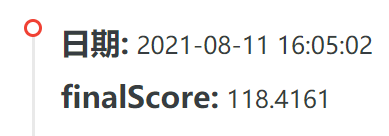

特征组合，且删除一些相似特征后变差了。

##### RandomForest

In [225]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_modify, [x for x in data_purchase_is_dis_time_modify.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],RandomForestRegressor(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_modify, [x for x in data_redeem_is_dis_time_modify.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], RandomForestRegressor(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_modify)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_modify_rt_predict.csv',index=False,header=None)

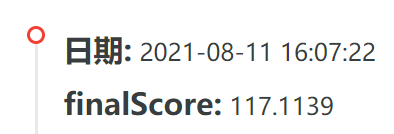

### 特征筛选

#### 使用SHAP包获取优胜特征

In [226]:
# 分割数据集

def split_data_underline(data):
    trainset = data[(datetime.date(2014,4,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,8,1))]
    testset = data[(datetime.date(2014,8,1) <= data['date'].dt.date) & (data['date'].dt.date < datetime.date(2014,9,1))]
    return trainset, testset

##### purchase

In [227]:
feature = data_purchase_is_dis_time

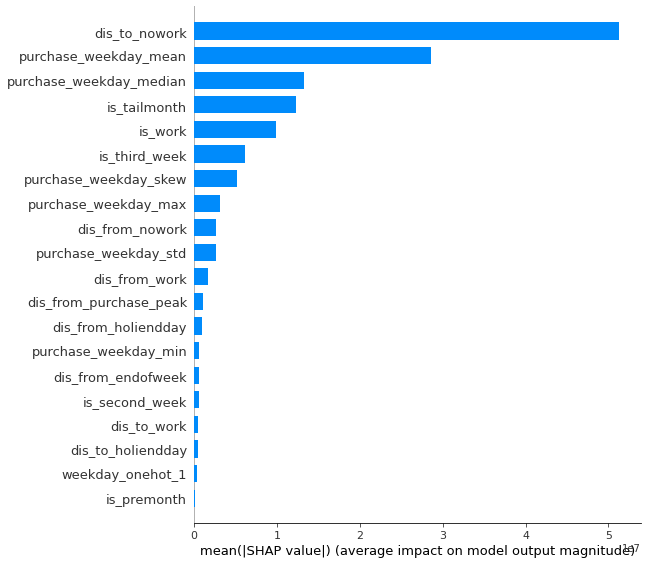

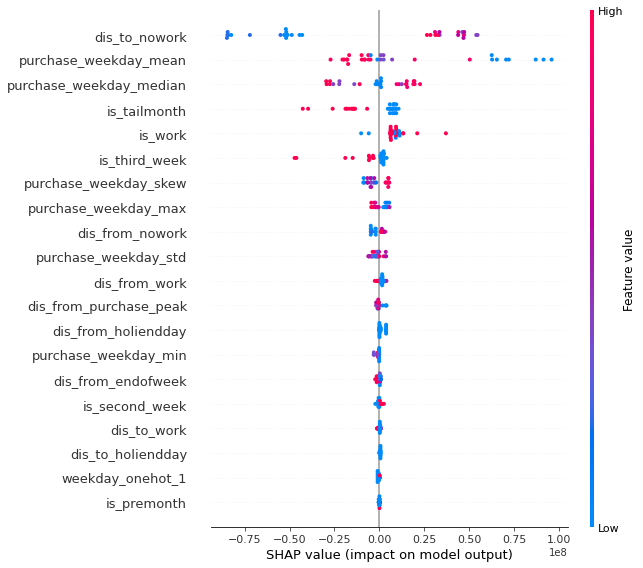

In [229]:
import shap
shap.initjs()
from sklearn import tree
model = tree.DecisionTreeRegressor()
train, test = split_data_underline(feature.dropna())
features = [x for x in train.columns if x not in date_indexs]
model.fit(train[features].drop(labels+['date'], axis=1), train['total_purchase_amt'])

explainer = shap.TreeExplainer(model)
shap_testues = explainer.shap_values(test[features].drop(labels+['date'], axis=1))

shap.summary_plot(shap_testues, test[features].drop(labels+['date'], axis=1), plot_type='bar')

shap.summary_plot(shap_testues, test[features].drop(labels+['date'], axis=1))

tree_important_purchase = pd.DataFrame(np.mean(np.abs(shap_testues), axis=0),[x for x in features if x not in labels + date_indexs + ['date']]).reset_index()

In [230]:
len(tree_important_purchase)

34

In [231]:
tree_important_purchase = tree_important_purchase.sort_values(0, ascending=False).reset_index(drop=True)
tree_important_purchase = list(tree_important_purchase[:25]['index'])

##### redeem

In [233]:
feature = data_redeem_is_dis_time

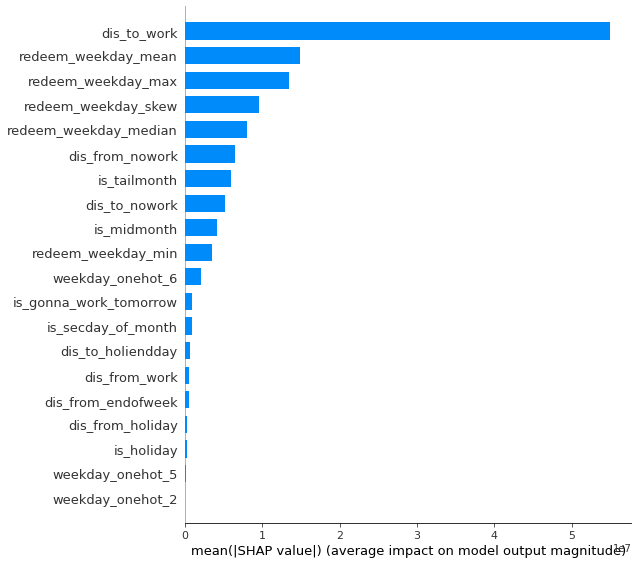

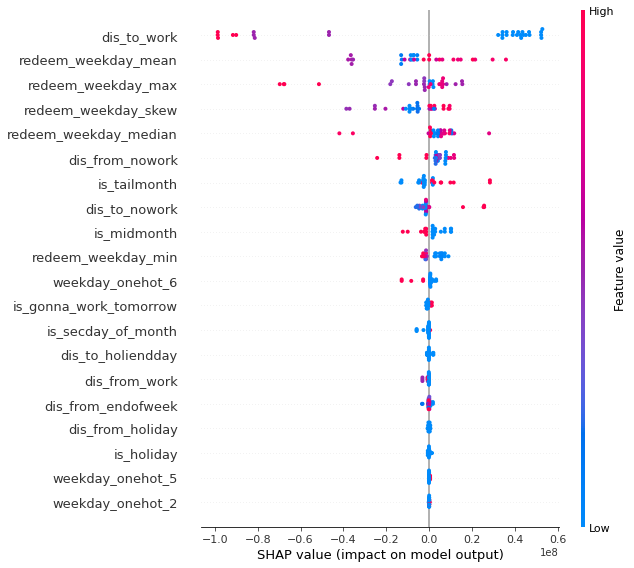

In [234]:
shap.initjs()
from sklearn import tree
model = tree.DecisionTreeRegressor()
train, test = split_data_underline(feature.dropna())
features = [x for x in train.columns if x not in date_indexs]
model.fit(train[features].drop(labels+['date'], axis=1), train['total_redeem_amt'])

explainer = shap.TreeExplainer(model)
shap_testues = explainer.shap_values(test[features].drop(labels+['date'], axis=1))

shap.summary_plot(shap_testues, test[features].drop(labels+['date'], axis=1), plot_type='bar')

shap.summary_plot(shap_testues, test[features].drop(labels+['date'], axis=1))

tree_important_redeem = pd.DataFrame(np.mean(np.abs(shap_testues), axis=0),[x for x in features if x not in labels + date_indexs + ['date']]).reset_index()

In [235]:
len(tree_important_redeem)

29

In [237]:
tree_important_redeem = tree_important_redeem.sort_values(0, ascending=False).reset_index(drop=True)
tree_important_redeem = list(tree_important_redeem[:25]['index'])

In [238]:
tree_important_redeem

['dis_to_work',
 'redeem_weekday_mean',
 'redeem_weekday_max',
 'redeem_weekday_skew',
 'redeem_weekday_median',
 'dis_from_nowork',
 'is_tailmonth',
 'dis_to_nowork',
 'is_midmonth',
 'redeem_weekday_min',
 'weekday_onehot_6',
 'is_gonna_work_tomorrow',
 'is_secday_of_month',
 'dis_to_holiendday',
 'dis_from_work',
 'dis_from_endofweek',
 'dis_from_holiday',
 'is_holiday',
 'weekday_onehot_5',
 'weekday_onehot_2',
 'dis_from_redeem_valley',
 'weekday_onehot_1',
 'dis_from_redeem_peak',
 'weekday_onehot_0',
 'is_work']

#### 模型测试

In [239]:
data_purchase_is_dis_time_drop = data_purchase_is_dis_time[['date']+labels+tree_important_purchase]
data_redeem_is_dis_time_drop = data_redeem_is_dis_time[['date']+labels+tree_important_redeem]
trainset, testset = split_data_underline(data_purchase_is_dis_time_drop)
result_purchase_lr = generate_under_result(data_purchase_is_dis_time_drop, [x for x in data_purchase_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis_time_drop, [x for x in data_redeem_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [240]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

178.4789911033591

In [241]:
add_two_df(multi_model_eva(data_purchase_is_dis_time_drop, 'purchase'), multi_model_eva(data_redeem_is_dis_time_drop, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,178.478991,149.831519,174.975734,179.352374,187.192717,172.143186
1,2014-07-25,169.274886,154.584423,156.545362,163.574757,182.474445,165.331187
2,2014-07-18,183.213001,150.707739,177.182720,182.824709,183.437919,173.170766
3,2014-07-11,174.125772,160.326549,179.383855,184.430063,188.174847,182.153500
4,2014-07-04,158.548950,150.786097,157.143529,160.475748,175.663381,161.299566
5,2014-06-27,170.533542,154.414046,163.972660,146.853349,169.551929,150.628496
6,2014-06-20,156.922685,161.335374,164.340360,151.350121,164.349256,165.367769


##### linear

In [242]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_drop, [x for x in data_purchase_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_drop, [x for x in data_redeem_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_drop)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_drop_linear_predict.csv',index=False,header=None)

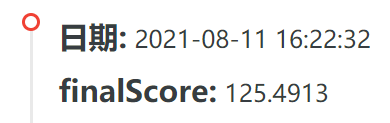

In [243]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_drop, [x for x in data_purchase_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],MLPRegressor(solver='lbfgs'),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_drop, [x for x in data_redeem_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], MLPRegressor(solver='lbfgs'),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_drop)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_drop_mlp_predict.csv',index=False,header=None)

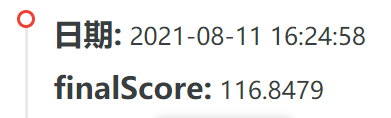

#### 使用Permutation importance包获取优胜特征

##### purchase

In [247]:
feature = data_purchase_is_dis_time.copy()

In [248]:
feature.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-03-31,398884905.0,423852634.0,0,0,0,0,1,0,0,...,3,6,1,6,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-01,453320585.0,277429358.0,0,0,0,0,1,0,0,...,2,5,0,5,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-02,355347118.0,272612066.0,0,0,0,0,1,0,1,...,1,4,1,4,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-03,363877120.0,266605457.0,0,0,0,0,1,0,1,...,0,3,2,3,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-04,251895894.0,200192637.0,0,0,0,0,1,0,1,...,1,2,3,2,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [249]:
features = feature.columns

In [252]:
import eli5
from eli5.sklearn import PermutationImportance
model = LinearRegression()
train, test = split_data_underline(feature.dropna())
model.fit(train[features].drop(labels+['date'], axis=1), train['total_purchase_amt'])
perm = PermutationImportance(model, random_state=42).fit(test[features].drop(labels+['date'], axis=1), test['total_purchase_amt'])
liner_important_purchase = pd.DataFrame(np.abs(perm.feature_importances_), [x for x in features if x not in labels + date_indexs + ['date']]).reset_index()
eli5.show_weights(perm, feature_names=list(str(x) for x in features if x not in labels + ['date']))

liner_important_purchase = liner_important_purchase.sort_values(0, ascending=False).reset_index(drop=True)

In [253]:
len(liner_important_purchase)

34

In [254]:
liner_important_purchase = list(liner_important_purchase[:30]['index'])

##### redeem

In [ ]:
feature = data_redeem_is_dis_time.copy()
features = feature.columns

In [256]:
model = LinearRegression()
train, test = split_data_underline(feature.dropna())
model.fit(train[features].drop(labels+['date'], axis=1), train['total_redeem_amt'])
perm = PermutationImportance(model, random_state=42).fit(test[features].drop(labels+['date'], axis=1), test['total_redeem_amt'])
liner_important_redeem = pd.DataFrame(np.abs(perm.feature_importances_), [x for x in features if x not in labels + date_indexs + ['date']]).reset_index()
eli5.show_weights(perm, feature_names=list(str(x) for x in features if x not in labels + ['date']))

liner_important_redeem = liner_important_redeem.sort_values(0, ascending=False).reset_index(drop=True)
len(liner_important_redeem)

29

In [257]:
liner_important_redeem = list(liner_important_redeem[:25]['index'])

#### 模型测试

In [258]:
data_purchase_is_dis_time_drop = data_purchase_is_dis_time[['date']+labels+liner_important_purchase]
data_redeem_is_dis_time_drop = data_redeem_is_dis_time[['date']+labels+liner_important_redeem]
trainset, testset = split_data_underline(data_purchase_is_dis_time_drop)
result_purchase_lr = generate_under_result(data_purchase_is_dis_time_drop, [x for x in data_purchase_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_purchase_amt')
result_redeem_lr = generate_under_result(data_redeem_is_dis_time_drop, [x for x in data_redeem_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], target='total_redeem_amt')

In [259]:
total_AE(result_purchase_lr, result_redeem_lr, testset['total_purchase_amt'], testset['total_redeem_amt'])

179.49472873404096

In [260]:
add_two_df(multi_model_eva(data_purchase_is_dis_time_drop, 'purchase'), multi_model_eva(data_redeem_is_dis_time_drop, 'redeem'))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,179.494729,151.360656,174.617201,180.850997,191.868801,173.019675
1,2014-07-25,169.962084,149.298635,159.112106,161.264623,173.904466,166.982011
2,2014-07-18,183.748765,158.178784,172.723228,181.456679,181.838098,171.530477
3,2014-07-11,172.439189,162.969744,174.730823,188.041017,167.993005,183.661877
4,2014-07-04,154.684094,160.402761,152.233006,159.879226,174.408561,158.433527
5,2014-06-27,168.785847,138.093487,161.314355,150.438785,172.949935,149.499418
6,2014-06-20,158.190516,152.689482,169.287229,165.327430,166.302309,173.110973


##### linear

In [261]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_drop, [x for x in data_purchase_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],LinearRegression(),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_drop, [x for x in data_redeem_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], LinearRegression(),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_drop)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_drop2_linear_predict.csv',index=False,header=None)

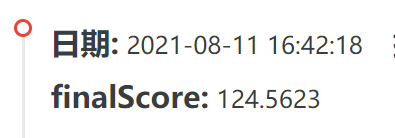

In [262]:
result_purchase_lr = generate_online_result(data_purchase_is_dis_time_drop, [x for x in data_purchase_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']],MLPRegressor(solver='lbfgs'),'total_purchase_amt')
result_redeem_lr = generate_online_result(data_redeem_is_dis_time_drop, [x for x in data_redeem_is_dis_time_drop.columns if x not in ['total_purchase_amt','total_redeem_amt','date']], MLPRegressor(solver='lbfgs'),'total_redeem_amt')

trainset, testset = split_data_online(data_purchase_is_dis_time_drop)
normalize_upload_file(result_purchase_lr, result_redeem_lr, testset).to_csv('20210811_is_dis_time_drop2_mlp_predict.csv',index=False,header=None)

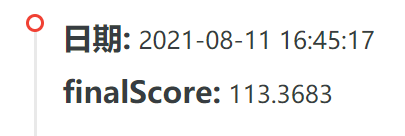

## AIC模型平均

In [269]:
# 定义AIC,BIC评价指标

def AIC(L: Iterable, delta: float, n_features: int):
    return L * np.log10(delta) + 2 * (n_features + 1)
def AIC(L: Iterable, delta: float, n_features: int):
    return L * np.log10(delta) + (n_features + 1) * np.log10(L)

In [270]:
# 使用AIC指标融合模型

def feature_extract_AIC(data: pd.DataFrame, model: object, types: str)->Tuple[List[str], float]:
    features = [x for x in data.columns if x not in labels + ['date']]
    random.shuffle(features)
    results = []
    test_score = 1e9
    train_score = 0
    for i in features:
        test_score_update = np.mean(week_evalution_single(data[results + [i] + labels + ['date']], model, types)[0])
        if test_score_update < test_score:
            test_score = test_score_update
            results.append(i)
            
    trainset, testset = split_data_underline(data)
    feature = results # 挑选重要的特征
    model.fit(X=trainset[feature], y=trainset['total_' + types + '_amt'])
    train_result_lr = model.predict(trainset[feature])
    delta = mean_squared_error(train_result_lr, trainset['total_' + types + '_amt'])
    #delta = np.sum(AE(trainset['total_' + types + '_amt'], train_result_lr).apply(lambda x : np.exp(-x/0.1))*10)
    return results, AIC(len(trainset), delta, len(feature))

def multi_model(data: pd.DataFrame, model: object, types: str)->Tuple[List[List[str]], float]:
    features = []
    weights = []
    for i in range(100):
        results_update, score_update = feature_extract_AIC(data, model, types)
        features.append(results_update)
        weights.append(score_update)
    avg = np.mean(weights)
    weights = [x - avg for x in weights]
    weights = [np.power((-1 * x / 2), 10) for x in weights]
    summ = np.sum(weights)
    weights = [x / summ for x in weights]
    return features, weights

In [271]:
purchase_features, purchase_weight = multi_model(data_purchase_is_dis_time, model=LinearRegression(), types = 'purchase')

In [272]:
redeem_features, redeem_weight = multi_model(data_redeem_is_dis_time, model=LinearRegression(), types = 'redeem')

In [275]:
# 重载DataFrame乘法

def scale_df(df1, features = None, eta = 1):
    data = df1.copy()
    if not features:
        features = [x for x in data.columns if x != 'interval']
    for i in features:
        data[i] *= eta
    return data

In [273]:
def eva_for_aic(data_purchase, purchase_features, purchase_weight):
    results = pd.DataFrame()
    for index, feature in enumerate(purchase_features):
        if results.empty:
            results = scale_df(multi_model_eva(data_purchase[['date'] + labels + feature], 'purchase'), 
                               eta = purchase_weight[index])
        else:
            results = add_two_df(results, multi_model_eva(data_purchase[['date'] + labels + feature], 'purchase')
                                 , left_a = 1,
                                 right_a = purchase_weight[index])
    return results

In [276]:
add_two_df(eva_for_aic(data_purchase_is_dis_time, purchase_features, purchase_weight), 
           eva_for_aic(data_redeem_is_dis_time, redeem_features, redeem_weight))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
0,2014-08-01,192.746415,165.336282,190.456272,193.184390,195.492111,184.287658
1,2014-07-25,163.752095,166.478242,172.755129,174.087496,164.977115,170.404865
2,2014-07-18,166.492647,170.835867,171.781778,173.365560,167.987097,172.277650
3,2014-07-11,164.212456,170.831284,174.963995,175.647247,173.799212,170.258329
4,2014-07-04,155.725778,159.263950,162.318340,159.424868,157.695580,159.146107
5,2014-06-27,163.197857,173.720241,176.613895,174.725309,177.693329,169.660356
6,2014-06-20,161.263477,162.024082,167.199665,164.226823,170.412047,161.951949


In [280]:
# 重载DataFrame加法

def add_two_df2(df1, df2, features = None, left_a = 0.45, right_a = 0.55):
    data = df1.copy()
    if not features:
        features = [x for x in data.columns if x != 'date']
    for i in features:
        data[i] = (data[i] * left_a + df2[i] * right_a)
    return data

In [279]:
# 重载DataFrame乘法

def scale_df2(df1, features = None, eta = 1):
    data = df1.copy()
    if not features:
        features = [x for x in data.columns if x != 'date']
    for i in features:
        data[i] *= eta
    return data

In [277]:
def multi_models(data, types:str = 'purchase'):
    results = pd.DataFrame()
    trainset, testset = split_data_online(data)
    results['date'] = testset['date']
    results['date'] = results['date'].astype(str)
    results['date'] = results['date'].str.replace('-','')
    for model in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')]:
        results[repr(model).split('(')[0]] = generate_online_result(data, [x for x in data.columns 
                                                            if x not in ['total_purchase_amt','total_redeem_amt','date']],model,'total_' + types + '_amt')
    return results

def multi_model_predict(data_purchase, purchase_features, purchase_weight):
    results = pd.DataFrame()
    for index, feature in enumerate(purchase_features):
        if results.empty:
            results = scale_df2(multi_models(data_purchase[['date'] + labels + feature], 'purchase'), 
                               eta = purchase_weight[index])
        else:
            results = add_two_df2(results, multi_models(data_purchase[['date'] + labels + feature], 'purchase')
                                 , left_a = 1,
                                 right_a = purchase_weight[index])
    return results

In [281]:
results = multi_model_predict(data_purchase_is_dis_time, purchase_features, purchase_weight)
results

,date,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
154,20140901,3.317740e+08,3.147958e+08,3.135184e+08,3.170261e+08,2.651099e+08,313351936.0
155,20140902,3.145634e+08,3.276149e+08,3.243486e+08,3.196929e+08,3.141901e+08,331813728.0
156,20140903,3.235738e+08,2.969757e+08,3.029979e+08,3.058181e+08,2.965356e+08,301691200.0
157,20140904,3.171494e+08,2.842051e+08,2.905812e+08,2.923729e+08,2.837557e+08,287836000.0
158,20140905,2.501982e+08,2.386268e+08,2.381963e+08,2.392777e+08,2.144598e+08,235384496.0
159,20140906,1.688247e+08,1.839413e+08,1.828161e+08,1.835054e+08,1.837353e+08,173647456.0
160,20140907,1.691179e+08,1.783623e+08,1.765443e+08,1.743941e+08,1.848949e+08,176061840.0
161,20140908,2.030123e+08,1.476279e+08,1.701604e+08,1.733542e+08,2.484179e+08,154407552.0
162,20140909,3.148760e+08,3.145348e+08,3.229510e+08,3.188067e+08,3.142316e+08,326839968.0
163,20140910,3.183434e+08,3.010258e+08,3.058722e+08,3.087395e+08,2.964862e+08,312708256.0


In [282]:
results.to_csv('20210811_multi_models_purchase.csv',index=False,header=None)

In [283]:
results = multi_model_predict(data_redeem_is_dis_time, redeem_features, redeem_weight)
results

,date,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor
154,20140901,3.375858e+08,3.515793e+08,3.409053e+08,3.354881e+08,3.246678e+08,351644288.0
155,20140902,3.048882e+08,2.731295e+08,2.835855e+08,2.687187e+08,3.100407e+08,255903680.0
156,20140903,3.077181e+08,2.900937e+08,2.814521e+08,2.802007e+08,3.137465e+08,294901120.0
157,20140904,2.593635e+08,2.440409e+08,2.588256e+08,2.622411e+08,2.758849e+08,255278336.0
158,20140905,2.372062e+08,2.761790e+08,2.575692e+08,2.514349e+08,2.440224e+08,266180912.0
159,20140906,1.868168e+08,1.689687e+08,1.816098e+08,1.724729e+08,1.850665e+08,183253856.0
160,20140907,2.127267e+08,1.591679e+08,1.846437e+08,1.627790e+08,2.089521e+08,173601760.0
161,20140908,1.928232e+08,1.632988e+08,1.712169e+08,2.050973e+08,3.143669e+08,187581648.0
162,20140909,3.042379e+08,2.723795e+08,2.903534e+08,2.548737e+08,3.082765e+08,262366240.0
163,20140910,3.464709e+08,3.405912e+08,3.130898e+08,3.067936e+08,3.165495e+08,299545184.0


In [284]:
results.to_csv('20210811_multi_models_redeem.csv',index=False,header=None)

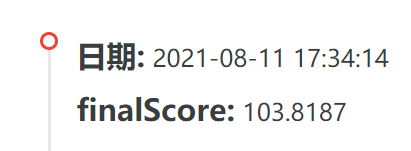

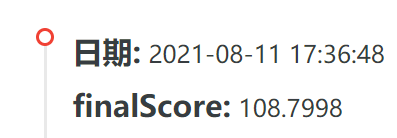

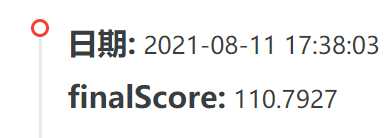

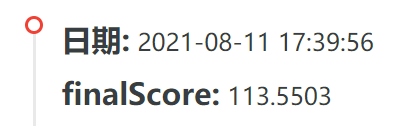

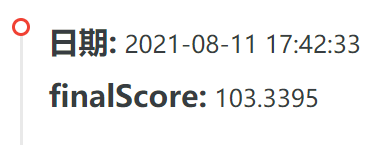

## 针对残差建模 

In [405]:
data_purchase = data_purchase_is_dis_time.copy()
data_redeem = data_redeem_is_dis_time.copy()

In [406]:
data_purchase = data_purchase[(data_purchase['date'].dt.date >= datetime.date(2014,4,1))&(data_purchase['date'].dt.date < datetime.date(2014,10,1))].reset_index(drop=True)
data_redeem = data_redeem[(data_redeem['date'].dt.date >= datetime.date(2014,4,1))&(data_redeem['date'].dt.date < datetime.date(2014,10,1))].reset_index(drop=True)

In [302]:
base = pd.read_csv('base.csv')

In [313]:
base = base.iloc[:,1:]

In [317]:
base.head()

,date,total_purchase_amt,total_redeem_amt,total_purchase_predicted_by_cycle,total_redeem_predicted_by_cycle
0,2014-04-01,0.730303,0.634370,6.207296e+08,4.373304e+08
1,2014-04-02,0.818276,0.761724,4.342629e+08,3.578884e+08
2,2014-04-03,0.768604,0.703255,4.734257e+08,3.791019e+08
3,2014-04-04,0.680148,0.926145,3.703544e+08,2.161569e+08
4,2014-04-05,0.654067,1.654855,3.093513e+08,9.861873e+07


In [347]:
# 线下测试
def generate_residual_result(data, base, model=LinearRegression(), types = 'purchase', split_time = datetime.date(2014,8,1)):
    # 产生残差
    data_purchase = data.copy()
    data_purchase['total_purchase_amt'] = base['total_purchase_amt']
    data_purchase['total_redeem_amt'] = base['total_redeem_amt']
    a_month = relativedelta(months=1)
    trainset = data_purchase[(datetime.date(2014,4,1) <= data_purchase['date'].dt.date) & (data_purchase['date'].dt.date < split_time)]
    testset = data_purchase[(split_time <= data_purchase['date'].dt.date) & (data_purchase['date'].dt.date < split_time + a_month)]
    feature = [x for x in data_purchase.columns 
               if x not in ['total_purchase_amt','total_redeem_amt','date']]
    model.fit(X=trainset[feature], y=trainset['total_' + types + '_amt'])
    result_purchase_rate = model.predict(testset[feature])
    
    base['date'] = pd.to_datetime(base['date'], format= "%Y%m%d")
    result_purchase_cycle = np.array(base[(base['date'].dt.date >= split_time)
                                          &(base['date'].dt.date < split_time + a_month)]['total_'+types+'_predicted_by_cycle'])
    result_purchase_residual =  result_purchase_rate * np.array(result_purchase_cycle)
    return result_purchase_residual

In [348]:
def generate_evaluate_for_residual(model,base,data_purchase,data_redeem):
    result = []
    for i in [datetime.date(2014, 8, 1), datetime.date(2014, 7, 25), datetime.date(2014, 7, 18), datetime.date(2014, 7, 11), 
              datetime.date(2014, 7, 4), datetime.date(2014, 6, 27), datetime.date(2014, 6,20)]:
        result_purchase_residual = generate_residual_result(data_purchase, base, model=model, types='purchase', split_time = i)
        result_redeem_residual = generate_residual_result(data_redeem, base, model=model, types='redeem', split_time= i)
        a_month = relativedelta(months=1)
        real_purchase = data_purchase[(data_purchase['date'].dt.date >= i) & (data_purchase['date'].dt.date < i + a_month)]['total_purchase_amt']
        real_redeem = data_redeem[(data_redeem['date'].dt.date >= i) & (data_redeem['date'].dt.date < i + a_month)]['total_redeem_amt']
        result.append(total_AE(result_purchase_residual, result_redeem_residual, real_purchase, real_redeem))
    return pd.DataFrame(result)

In [349]:
def multi_model_eva_for_residual(base,data_purchase,data_redeem):
    results = pd.DataFrame()
    for model in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), MLPRegressor(solver='lbfgs'), xgb.XGBRegressor(objective='reg:squarederror')]:
        if results.empty:
            results = draw_eva_table(generate_evaluate_for_residual(model,base,data_purchase,data_redeem)).rename(columns={0: repr(model).split('(')[0]})
        else:
            results = pd.merge(results, \
                               draw_eva_table(generate_evaluate_for_residual(model,base,data_purchase,data_redeem)).rename(columns={0: repr(model).split('(')[0]}))
    results = results[['interval'] + [x for x in results.columns if x != 'interval']]
    return results

In [350]:
def generate_evaluate_for_cycle(base,data_purchase,data_redeem):
    result = []
    for i in [datetime.date(2014, 8, 1), datetime.date(2014, 7, 25), datetime.date(2014, 7, 18), datetime.date(2014, 7, 11), 
                  datetime.date(2014, 7, 4), datetime.date(2014, 6, 27), datetime.date(2014, 6,20)]:
        a_month = relativedelta(months=1)
        testset = base[(base['date'].dt.date >= i) & (base['date'].dt.date < i + a_month)].reset_index(drop=True)
        result_purchase_residual = testset['total_purchase_predicted_by_cycle']
        result_redeem_residual = testset['total_redeem_predicted_by_cycle']
        real_purchase = data_purchase[(data_purchase['date'].dt.date >= i) & (data_purchase['date'].dt.date < i + a_month)].reset_index(drop=True)['total_purchase_amt']
        real_redeem = data_redeem[(data_redeem['date'].dt.date >= i) & (data_redeem['date'].dt.date < i + a_month)].reset_index(drop=True)['total_redeem_amt']
        result.append(total_AE(result_purchase_residual, result_redeem_residual, real_purchase, real_redeem))
    return pd.DataFrame(result).rename(columns={0: 'PureTimeSeries'})

In [351]:
pd.merge(multi_model_eva_for_residual(base,data_purchase,data_redeem), draw_eva_table(generate_evaluate_for_cycle(base,data_purchase,data_redeem)))

,interval,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,MLPRegressor,XGBRegressor,PureTimeSeries
0,2014-08-01,171.512454,165.748785,170.708103,175.174515,164.735513,167.294161,175.933714
1,2014-07-25,158.123224,156.641900,161.117738,163.412233,159.240085,157.260796,155.916275
2,2014-07-18,175.848600,166.999740,169.564187,172.427718,165.523110,164.423763,169.890622
3,2014-07-11,180.389158,166.272775,168.030036,171.034928,165.026856,165.004747,165.668307
4,2014-07-04,176.392629,164.297678,160.951542,163.291086,159.050825,159.414071,155.458113
5,2014-06-27,179.673783,164.908443,164.883978,164.559323,162.890849,159.442651,160.758547
6,2014-06-20,155.694310,151.567478,148.334266,147.121888,142.781868,144.714307,154.336379


### 只用周期因子

In [327]:
# 测试八月份
_, testset = split_data_underline(data_purchase_dis_drop)

In [328]:
real_purchase = testset['total_purchase_amt']
real_redeem = testset['total_redeem_amt']

In [416]:
result_purchase_cycle = np.array(base[(base['date'].dt.date >= datetime.date(2014,8,1))&(base['date'].dt.date < datetime.date(2014,9,1))]['total_purchase_predicted_by_cycle'])
result_redeem_cycle = np.array(base[(base['date'].dt.date >= datetime.date(2014,8,1))&(base['date'].dt.date < datetime.date(2014,9,1))]['total_redeem_predicted_by_cycle'])
total_AE(result_purchase_cycle, result_redeem_cycle, real_purchase, real_redeem)

175.93371418259744

In [331]:
# 对生成结果进行可视化

def visual(result_purchase_lr: Iterable, result_redeem_lr: Iterable, testset: pd.DataFrame)->None:
    fig = plt.figure(figsize=(10,4))
    plt.plot(testset['date'], result_purchase_lr, label='predicted_purchase')
    plt.plot(testset['date'], testset['total_purchase_amt'], label='real_redeem')

    plt.legend(loc='best')
    plt.title("The distribution of real and predict purchase")
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.show()
    fig = plt.figure(figsize=(10,4))
    sns.barplot(testset['date'].dt.day ,result_purchase_lr - testset['total_purchase_amt'])

    fig = plt.figure(figsize=(10,4))
    plt.plot(testset['date'], result_redeem_lr, label='predicted_redeem')
    plt.plot(testset['date'], testset['total_redeem_amt'], label='real_redeem')

    plt.legend(loc='best')
    plt.title("The distribution of real and predict redeem")
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.show()
    fig = plt.figure(figsize=(10,4))
    sns.barplot(testset['date'].dt.day ,result_redeem_lr - testset['total_redeem_amt'])

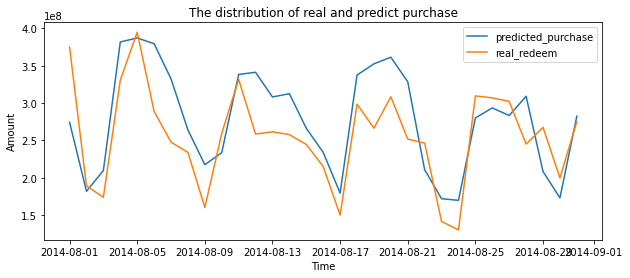

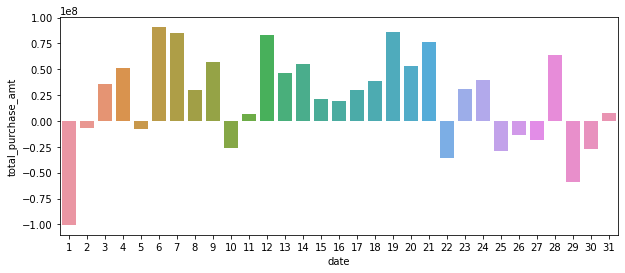

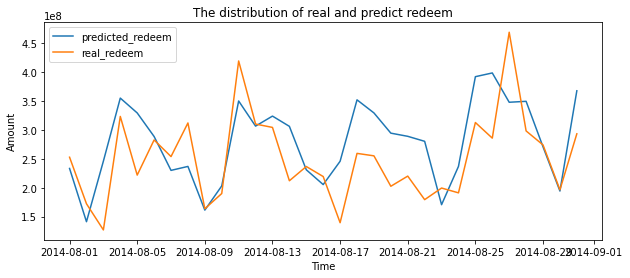

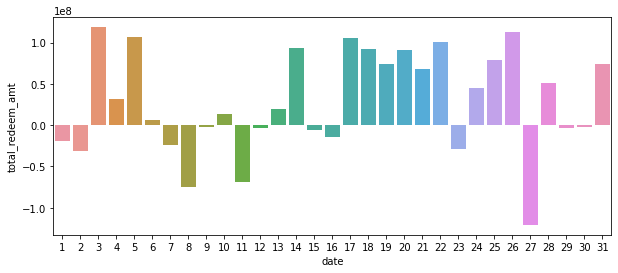

In [332]:
visual(result_purchase_cycle, result_redeem_cycle, testset)

### 周期因子加残差预测

In [408]:
data_purchase = data_purchase_is_dis_time.copy()[(data_purchase_is_dis_time['date'].dt.date >= datetime.date(2014,4,1))&(data_purchase_is_dis_time['date'].dt.date < datetime.date(2014,10,1))].reset_index(drop=True)
data_purchase['total_purchase_amt'] = base['total_purchase_amt']
data_purchase['total_redeem_amt'] = base['total_redeem_amt']

In [409]:
data_redeem = data_redeem_is_dis_time.copy()[(data_redeem_is_dis_time['date'].dt.date >= datetime.date(2014,4,1))&(data_redeem_is_dis_time['date'].dt.date < datetime.date(2014,10,1))].reset_index(drop=True)
data_redeem['total_purchase_amt'] = base['total_purchase_amt']
data_redeem['total_redeem_amt'] = base['total_redeem_amt']

# data_purchase和base的时间跨度是不一样的

In [413]:
data_purchase.head()

,date,total_purchase_amt,total_redeem_amt,is_weekend,is_holiday,is_firstday_of_holiday,is_lastday_of_holiday,is_work,is_gonna_work_tomorrow,is_worked_yestday,...,dis_from_middleofweek,dis_from_endofweek,dis_from_purchase_peak,dis_from_purchase_valley,purchase_weekday_median,purchase_weekday_mean,purchase_weekday_min,purchase_weekday_max,purchase_weekday_std,purchase_weekday_skew
0,2014-04-01,0.730303,0.634370,0,0,0,0,1,0,0,...,2,5,0,5,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
1,2014-04-02,0.818276,0.761724,0,0,0,0,1,0,1,...,1,4,1,4,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
2,2014-04-03,0.768604,0.703255,0,0,0,0,1,0,1,...,0,3,2,3,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
3,2014-04-04,0.680148,0.926145,0,0,0,0,1,0,1,...,1,2,3,2,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456
4,2014-04-05,0.654067,1.654855,1,1,1,0,0,0,1,...,2,1,4,1,303834661.5,3.060830e+08,158219402.0,392838756.0,5.412342e+07,0.357456


In [410]:
# 测试八月份
trainset_purchase, testset_purchase = split_data_underline(data_purchase)
result_purchase_rate = generate_under_result(data_purchase, [x for x in data_purchase.columns
                                                           if x not in ['total_purchase_amt','total_redeem_amt','date']], 
                                           target='total_purchase_amt')

In [411]:
trainset_redeem, testset_redeem = split_data_underline(data_redeem)
result_redeem_rate = generate_under_result(data_redeem, [x for x in data_redeem.columns
                                                           if x not in ['total_purchase_amt','total_redeem_amt','date']], 
                                           target='total_redeem_amt')

In [414]:
result_purchase_rate

array([0.92760159, 0.91465566, 0.95995417, 0.9548427 , 0.81565042,
       0.88328716, 0.89095249, 0.82924239, 0.86262508, 0.90605407,
       0.92585024, 0.84226029, 0.84964577, 0.90448524, 0.80720047,
       0.86006384, 0.86025025, 1.01085178, 0.87128623, 0.92206404,
       1.00248785, 0.90902411, 0.93293673, 0.95825817, 0.97381684,
       0.7998375 , 0.93579811, 0.97759503, 0.88727441, 0.91557641,
       0.93487503])

In [415]:
result_redeem_rate

array([1.105503  , 1.52630833, 1.02706939, 1.09475239, 1.18224243,
       1.12113639, 1.09416743, 1.117931  , 1.28691364, 1.03399731,
       0.80911627, 0.84530183, 0.83987794, 0.82756522, 0.83379001,
       1.00671931, 0.75128657, 0.80480908, 0.83842474, 0.83751309,
       1.03302884, 1.04759663, 1.20635598, 0.95900636, 1.01148731,
       1.04526512, 0.96244152, 1.0357408 , 1.06079905, 1.20068851,
       0.95083759])

In [417]:
total_AE(result_purchase_rate * result_purchase_cycle, result_redeem_rate * result_redeem_cycle, real_purchase, real_redeem)

177.3470230506793

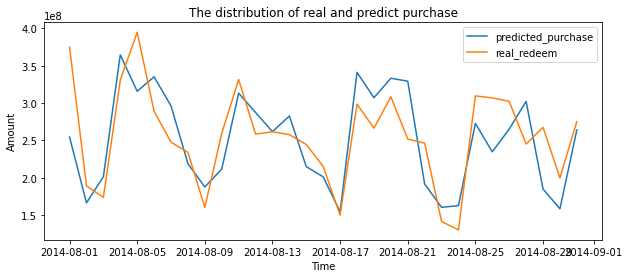

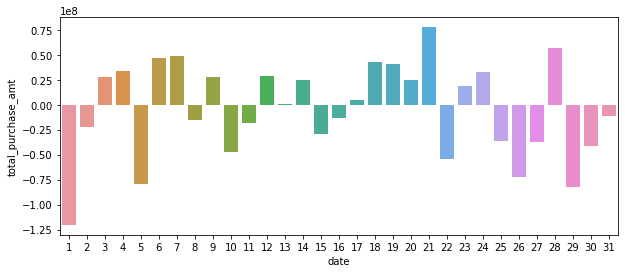

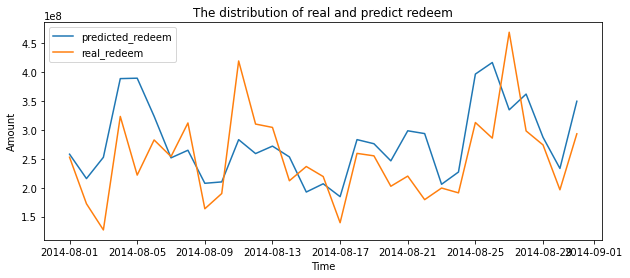

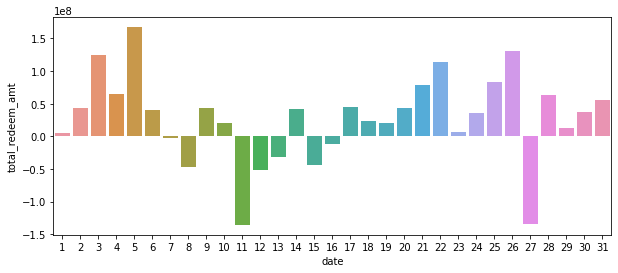

In [418]:
trainset, testset = split_data_underline(data_purchase_is_dis_time)
visual(result_purchase_rate * result_purchase_cycle, result_redeem_rate * result_redeem_cycle, testset)

### 生产线上结果

In [419]:
trainset_purchase, testset_purchase = split_data_online(data_purchase)
result_purchase_rate = generate_online_result(data_purchase, [x for x in data_purchase.columns
                                                           if x not in ['total_purchase_amt','total_redeem_amt','date']], 
                                           target='total_purchase_amt')

In [420]:
trainset_redeem, testset_redeem = split_data_online(data_redeem)
result_redeem_rate = generate_online_result(data_redeem, [x for x in data_redeem.columns
                                                           if x not in ['total_purchase_amt','total_redeem_amt','date']], 
                                           target='total_redeem_amt')

In [421]:
result_purchase_cycle = np.array(base[(base['date'].dt.date >= datetime.date(2014,9,1))&(base['date'].dt.date < datetime.date(2014,10,1))]['total_purchase_predicted_by_cycle'])
result_redeem_cycle = np.array(base[(base['date'].dt.date >= datetime.date(2014,9,1))&(base['date'].dt.date < datetime.date(2014,10,1))]['total_redeem_predicted_by_cycle'])

In [398]:
normalize_upload_file(result_purchase_cycle, result_redeem_cycle, testset_redeem).to_csv('20190622_cycle_liner.csv',index=False,header=None)

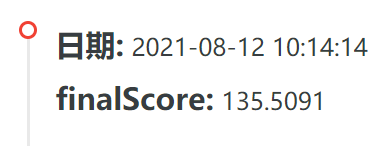

In [422]:
result_purchase_residual = result_purchase_rate * result_purchase_cycle 

In [423]:
result_redeem_residual = result_redeem_rate * result_redeem_cycle

In [487]:
result_purchase_residual = result_purchase_lr * result_purchase_cycle 

In [488]:
result_redeem_residual = result_redeem_lr * result_redeem_cycle

In [490]:
normalize_upload_file(result_purchase_residual, result_redeem_residual, testset_redeem).to_csv('20210812_residual_dis_drop_liner.csv',index=False,header=None)

- is (114)
- is_drop (112)
- dis_drop(89)

数据特征：dis_drop(原数据的)

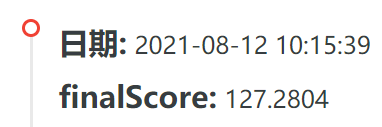